<a href="https://colab.research.google.com/github/nguyenthanhdat20130013/Machine-Learning/blob/main/ProjectML_Nhom36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADULT DATASET UCI**

## **Mô tả dữ liệu**
Tập dữ liệu Adult là một tập dữ liệu có cấu trúc được thu thập từ Cục Thống kê Lao động Hoa Kỳ, bao gồm các thông tin về các cá nhân có độ tuổi từ 16 trở lên. Tập dữ liệu chứa tổng cộng 32.561 mẫu và 14 thuộc tính, trong đó 6 thuộc tính là dạng số và 8 thuộc tính là dạng chuỗi.  
Các thuộc tính bao gồm:
- age: Thuộc tính liên tục, biểu thị độ tuổi của một cá nhân.
- workclass: Thuộc tính rời rạc, biểu thị loại công việc của một cá nhân, bao gồm Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Thuộc tính liên tục, biểu thị trọng số cuối cùng của một cá nhân trong quá trình khảo sát mẫu dân số.
- education: Thuộc tính rời rạc, biểu thị trình độ học vấn của một cá nhân, bao gồm Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Thuộc tính liên tục, biểu thị trình độ học vấn của một cá nhân dưới dạng số.
- marital-status: Thuộc tính rời rạc, biểu thị tình trạng hôn nhân của một cá nhân, bao gồm Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Thuộc tính rời rạc, biểu thị nghề nghiệp của một cá nhân, bao gồm Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Thuộc tính rời rạc, biểu thị quan hệ gia đình của một cá nhân, bao gồm Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: Thuộc tính rời rạc, biểu thị chủng tộc của một cá nhân, bao gồm White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- gender: Thuộc tính rời rạc, biểu thị giới tính của một cá nhân, bao gồm Female, Male.
- capital-gain: Thuộc tính liên tục, biểu thị số tiền lời từ tài sản bất động sản của một cá nhân.
- capital-loss: Thuộc tính liên tục, biểu thị số tiền mất mát từ tài sản bất động sản hoặc đầu tư của một cá nhân.
- hours-per-week: Thuộc tính liên tục, biểu thị số giờ làm việc mỗi tuần của một cá nhân.
- native-country: Thuộc tính rời rạc, biểu thị quốc gia nơi một cá nhân sinh sống hoặc có nguồn gốc. Các giá trị có thể là: United-States, Cambodia, England, Puerto-Rico,....

# Thuộc tính mục tiêu, biểu thị thu nhập của một cá nhân, được chia thành hai lớp: thu nhập dưới 50 nghìn đô-la Mỹ và thu nhập từ 50 nghìn đô-la Mỹ trở lên 50K, <=50K 

Mục đích của phân tích tập dữ liệu của dataset Adult là hiểu và khám phá thông tin về đối tượng người lớn (tuổi từ 16 trở lên) ở Mỹ. Những thông tin này có thể được sử dụng để dự đoán khả năng thu nhập của một cá nhân, Phân tích tập dữ liệu này cũng có thể giúp ta hiểu rõ hơn về các xu hướng, mối quan hệ giữa các biến và tác động của chúng đến thu nhập của một người.

### 1. Tải về các thư viện cần thiết

In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
from IPython.display import Markdown, display
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as mat
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
import graphviz 
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
#
def printmd(string):
    display(Markdown(string))
    

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Project ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Project ML


### 2. Đọc dữ liệu **data** và **test**

In [5]:
# Xác định danh sách tên cột cho tập dữ liệu
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Đọc dữ liệu đào tạo từ tệp 'adult.data'
# Sử dụng biểu thức chính quy để phân tách dữ liệu trên dấu phẩy theo sau là khoảng trắng
# Đặt tên cột thành tên được xác định trong danh sách 'column_names'
train = pd.read_csv('adult.data', sep=",\s", header=None, names=column_names, engine='python')

# Đọc dữ liệu thử nghiệm từ tệp 'adult.test'
# Sử dụng biểu thức chính quy để phân tách dữ liệu trên dấu phẩy theo sau là khoảng trắng
# Đặt tên cột thành tên được xác định trong danh sách 'column_names'
test = pd.read_csv('adult.test', sep=",\s", header=None, names=column_names, engine='python')
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3. Biểu đồ tần suất (HISTOGRAM)

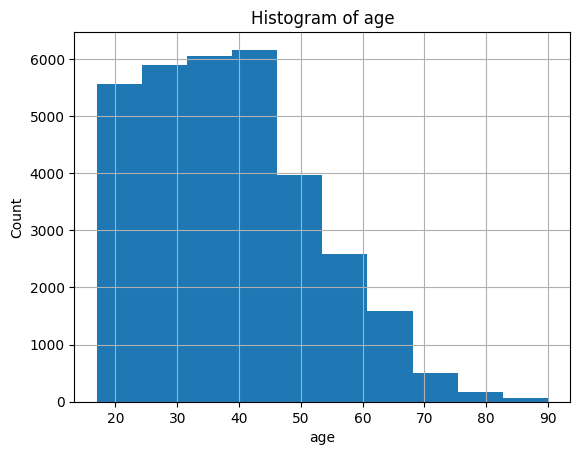

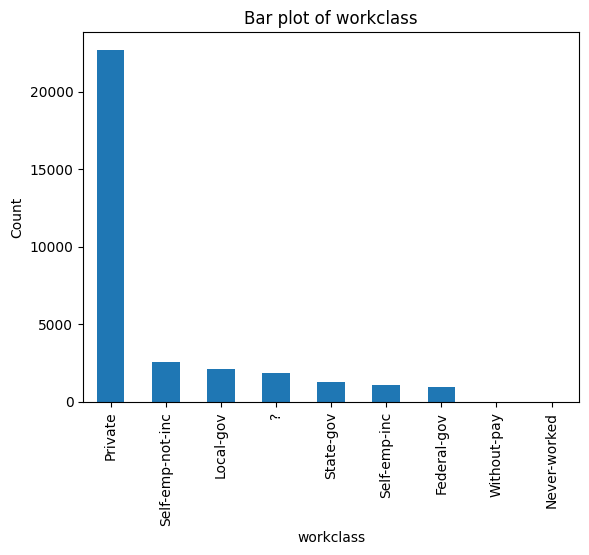

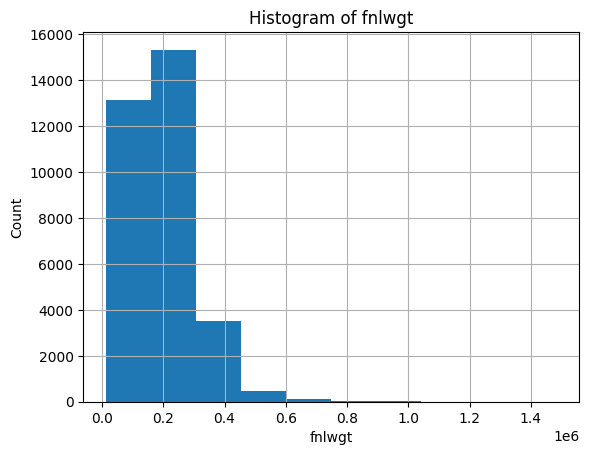

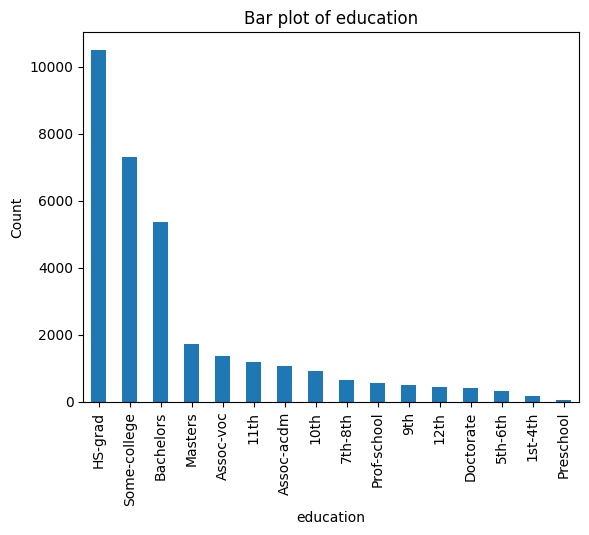

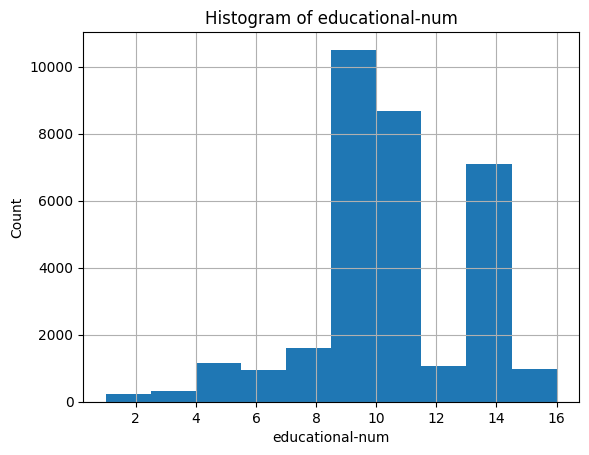

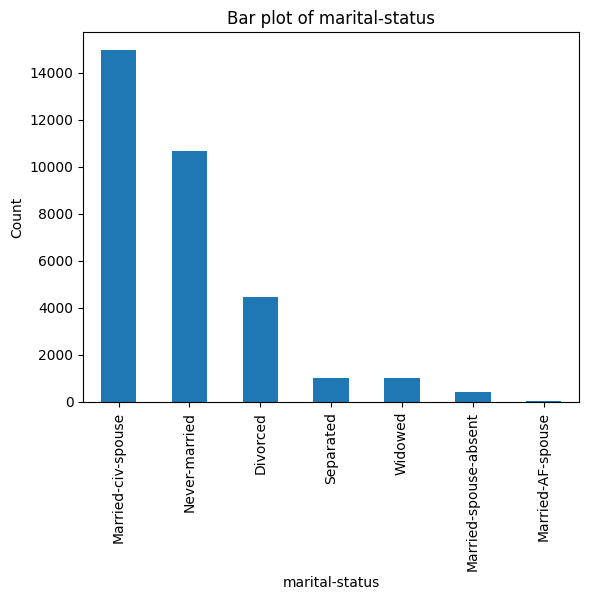

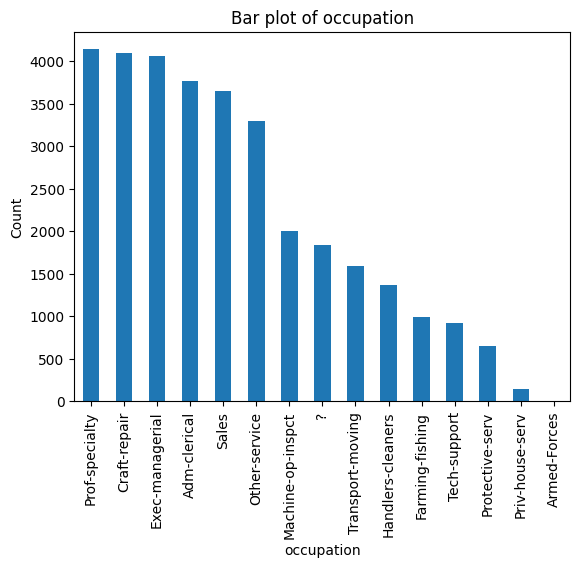

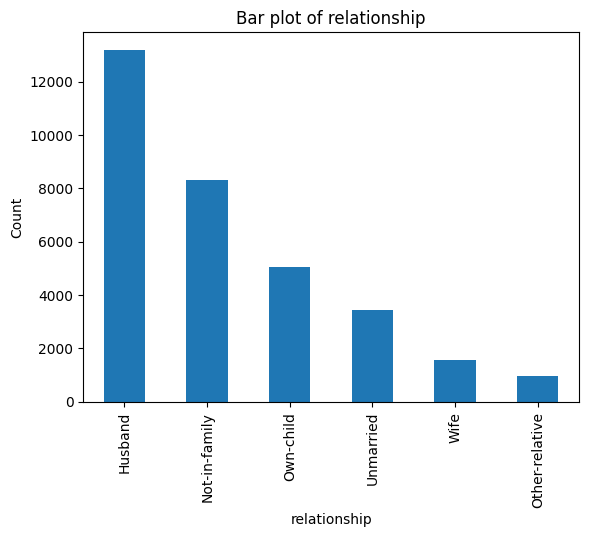

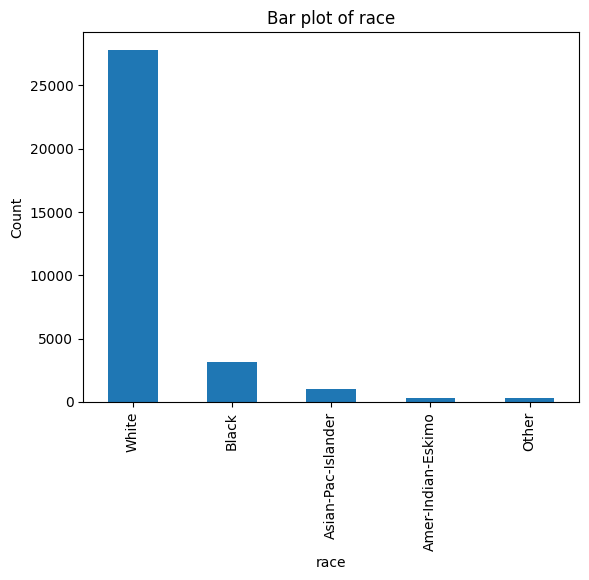

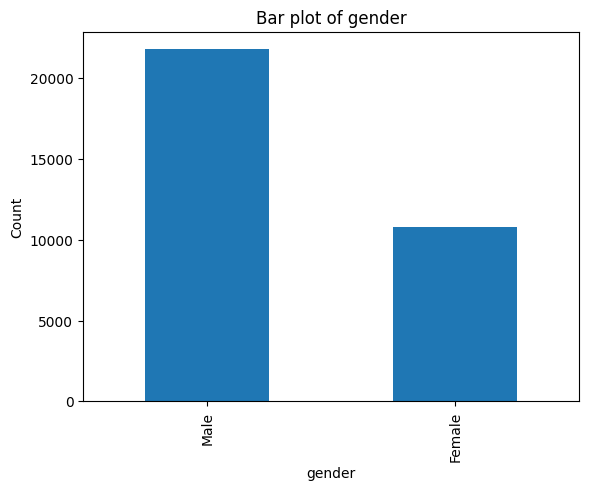

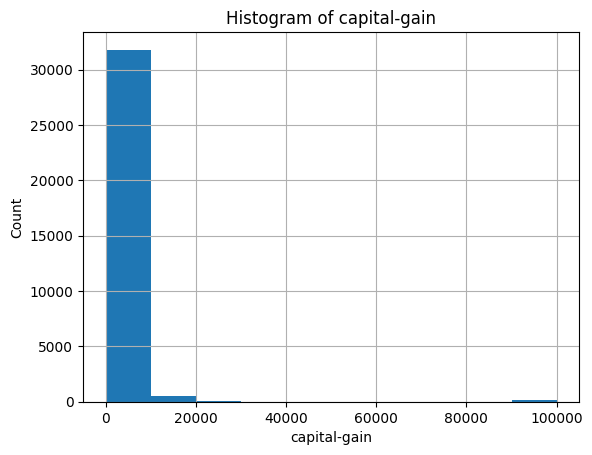

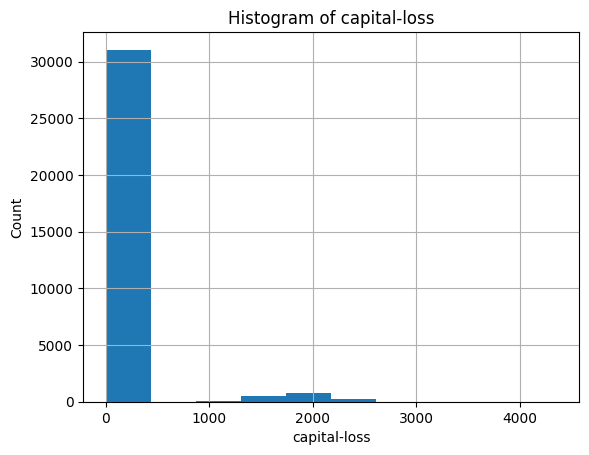

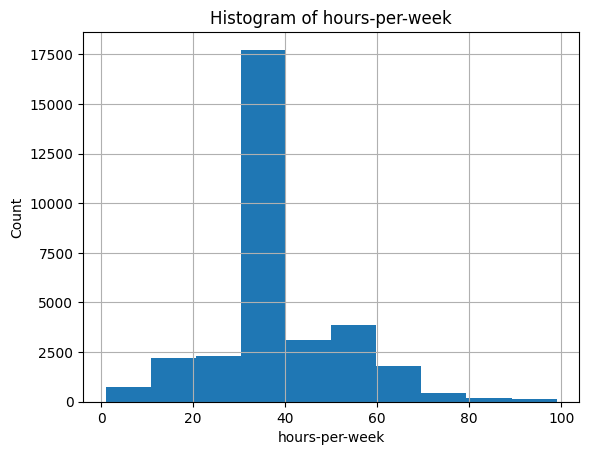

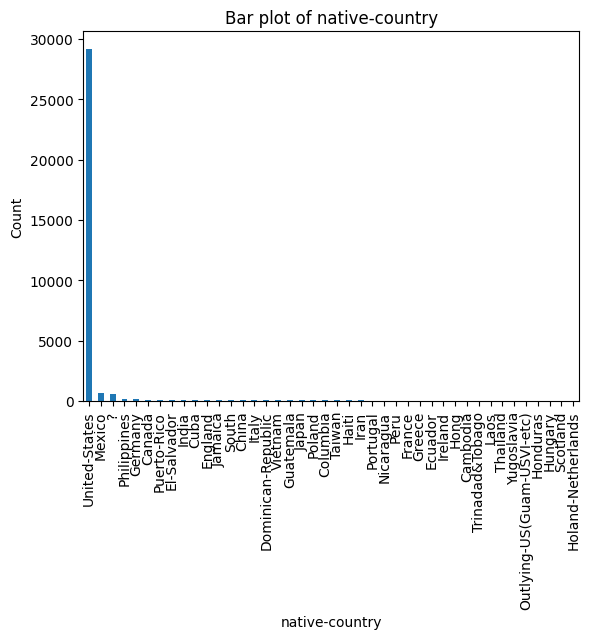

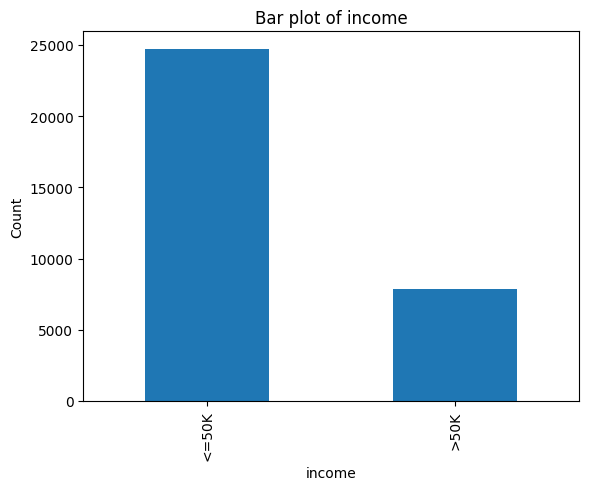

In [6]:
# Danh sách các thuộc tính
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Vẽ biểu đồ phân bố cho từng thuộc tính
for column in column_names:
    if train[column].dtype == 'object':
        # Thuộc tính hạng mục - sử dụng bar plot
        plt.figure()
        train[column].value_counts().plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar plot of {column}')
        plt.show()
    else:
        # Thuộc tính số học - sử dụng histogram
        plt.figure()
        train[column].hist()
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Histogram of {column}')
        plt.show()


## Phân tích dữ liệu

### Age

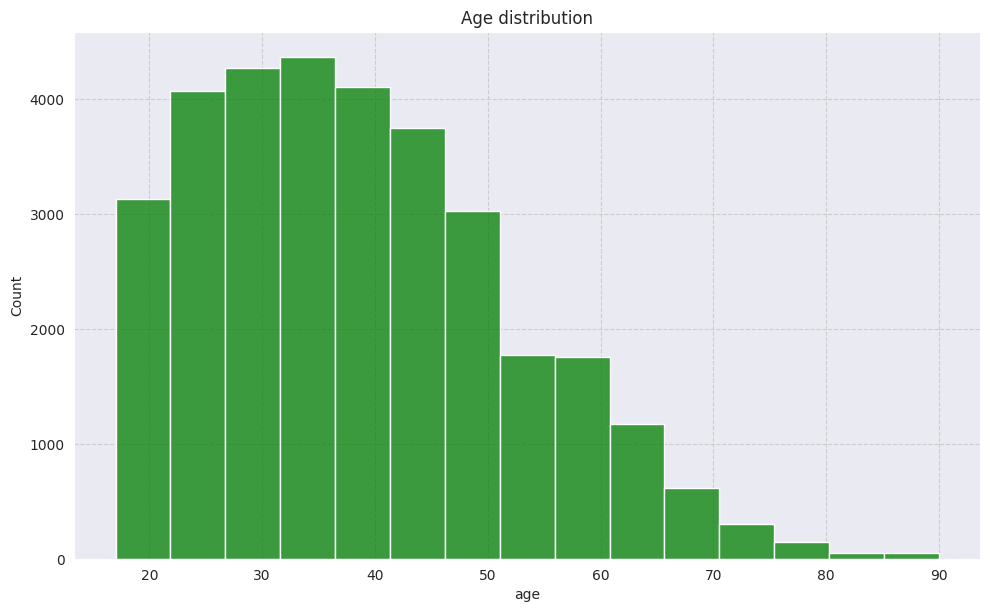

In [ ]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
plt.figure(figsize=(10,6))
sns.histplot(train['age'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

### Age vs Income

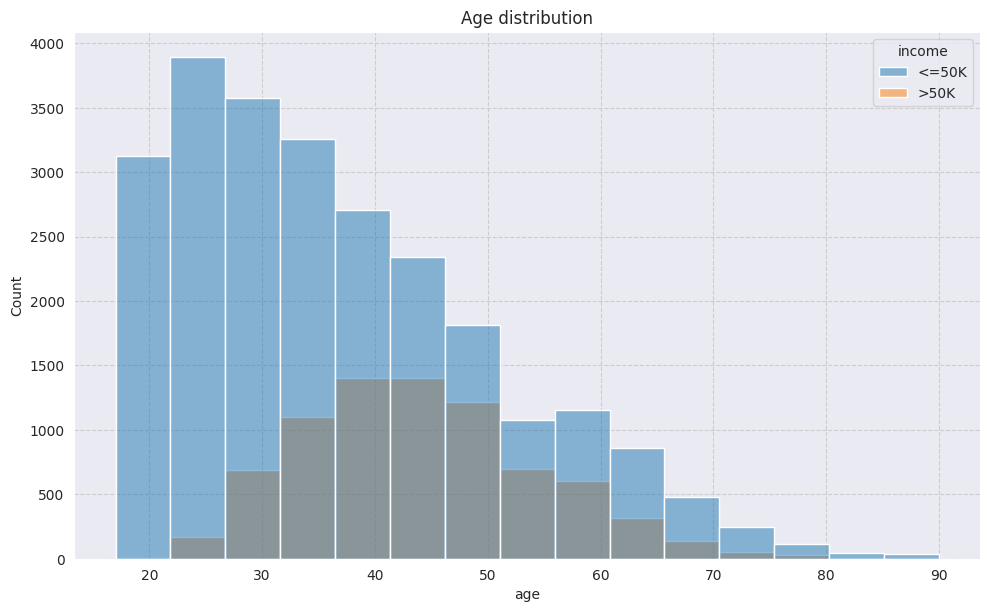

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['age'],hue=train['income'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

Từ biểu đồ, chúng ta có thể thấy rằng trong nhóm tuổi 0-20 không có mục nhập nào có mức lương lớn hơn 50 nghìn, nhóm lớn hơn 75 tuổi cũng vậy.

### **Workclass**

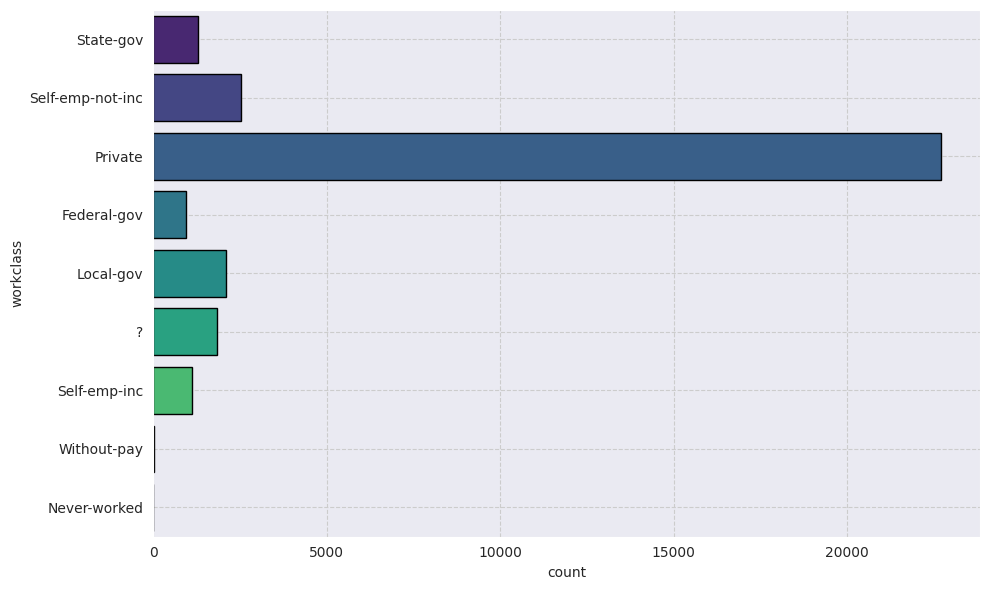

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['workclass'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()


### Workclass vs Income

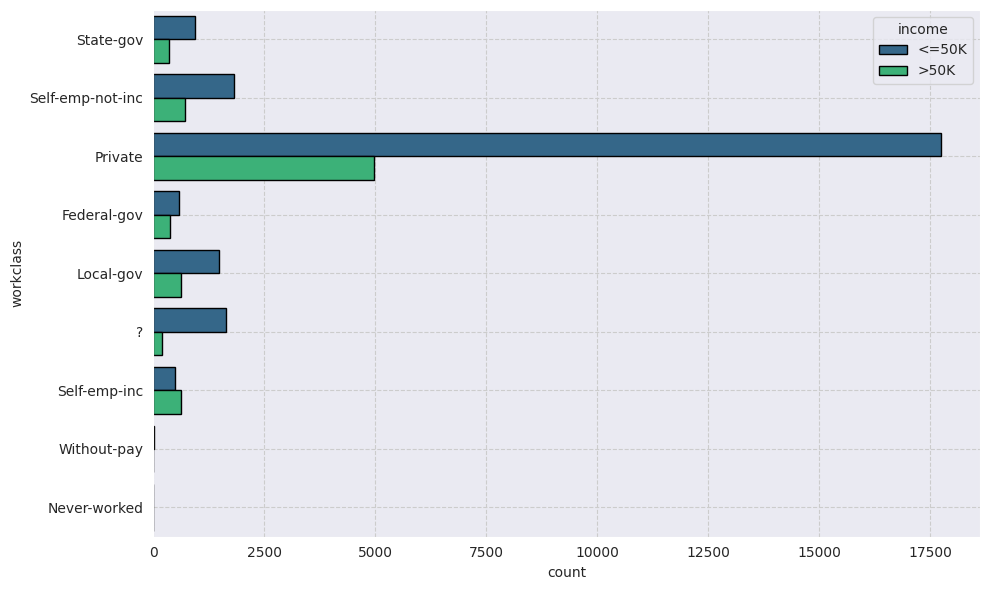

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['workclass'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Phần lớn các cá nhân làm việc trong khu vực tư nhân. Xác suất kiếm được trên 50.000 là tương tự giữa các tầng lớp lao động ngoại trừ công ty tư nhân và chính phủ liên bang. Chính phủ liên bang được coi là ưu tú nhất trong khu vực công, điều này rất có thể giải thích cơ hội kiếm được hơn 50.000 cao hơn.

Có một lớp làm việc có tên là '?', mà chúng tôi sẽ coi là giá trị NAN.

### Education

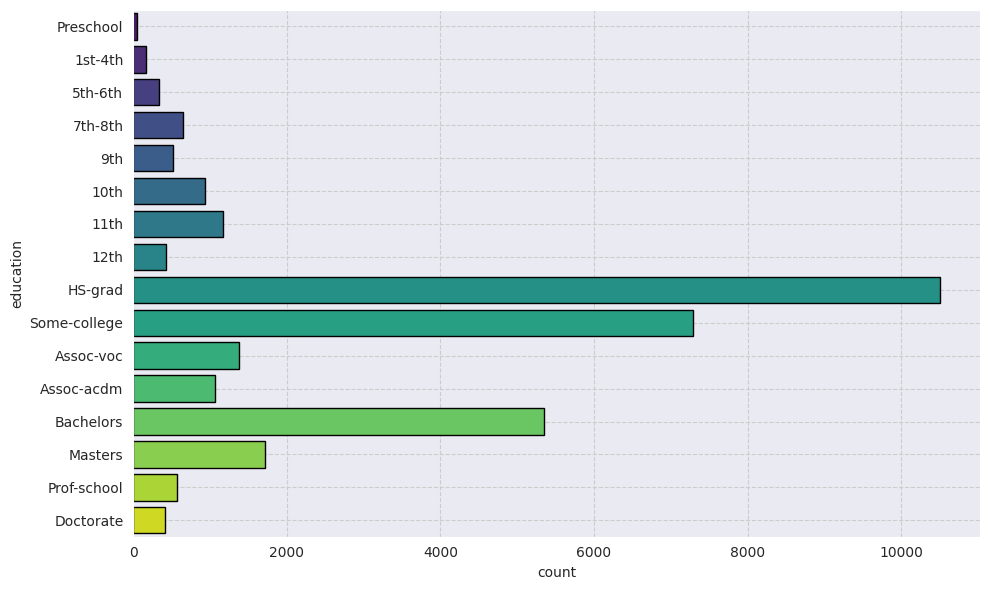

In [ ]:
plt.figure(figsize=(10, 6))
edu_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
             'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.countplot(y=train['education'], palette='viridis', saturation=0.9, edgecolor="black", order=edu_order)
plt.tight_layout()
plt.grid(True)
plt.show()

### Education vs Income

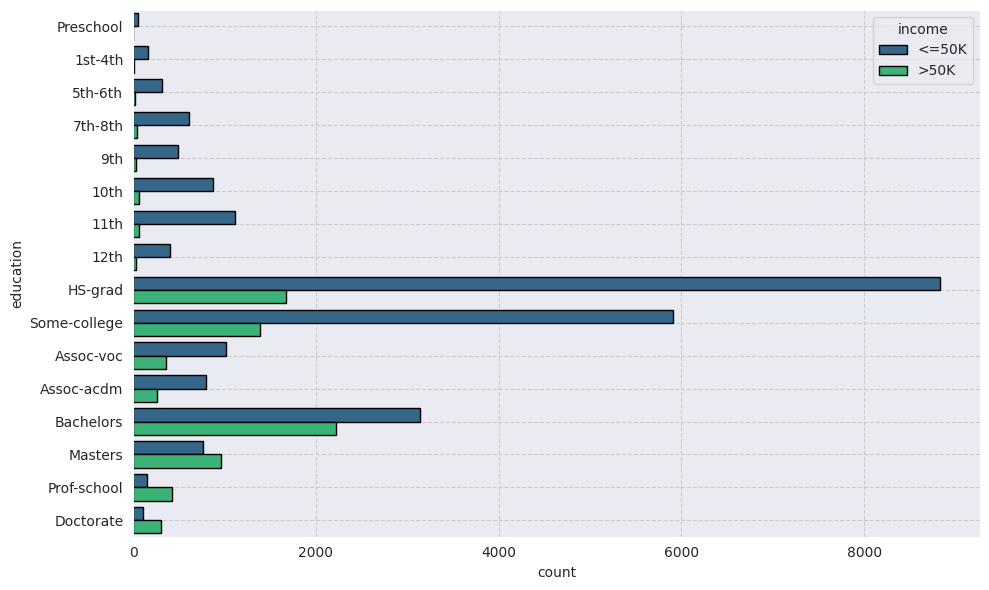

In [ ]:
plt.figure(figsize=(10,6))
edu_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
             'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.countplot(y=train['education'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black", order=edu_order)
plt.tight_layout()
plt.grid(True)
plt.show()

### Marital-status


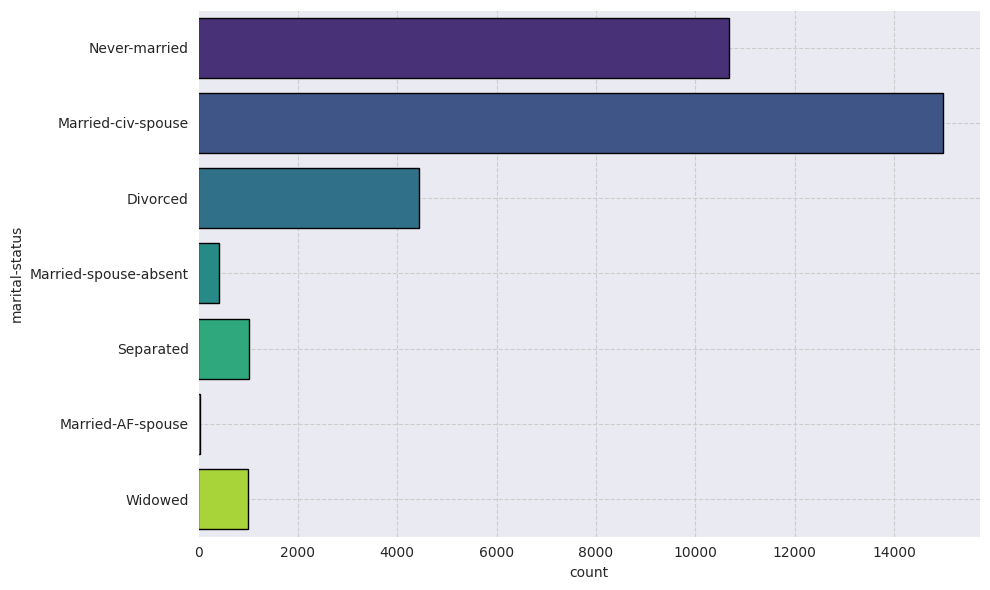

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['marital-status'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()


### Martial-status vs Income

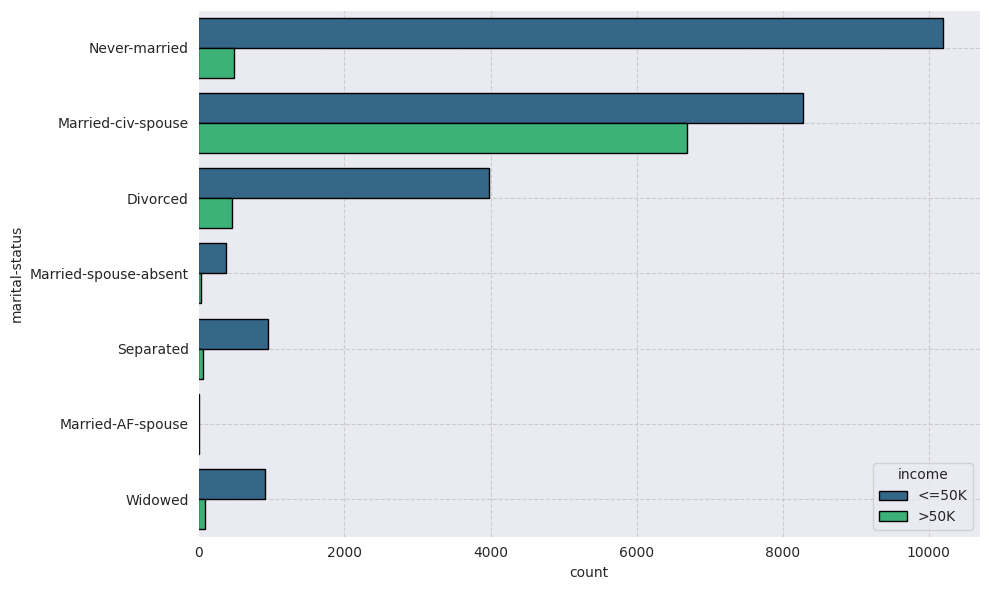

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['marital-status'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Occupation

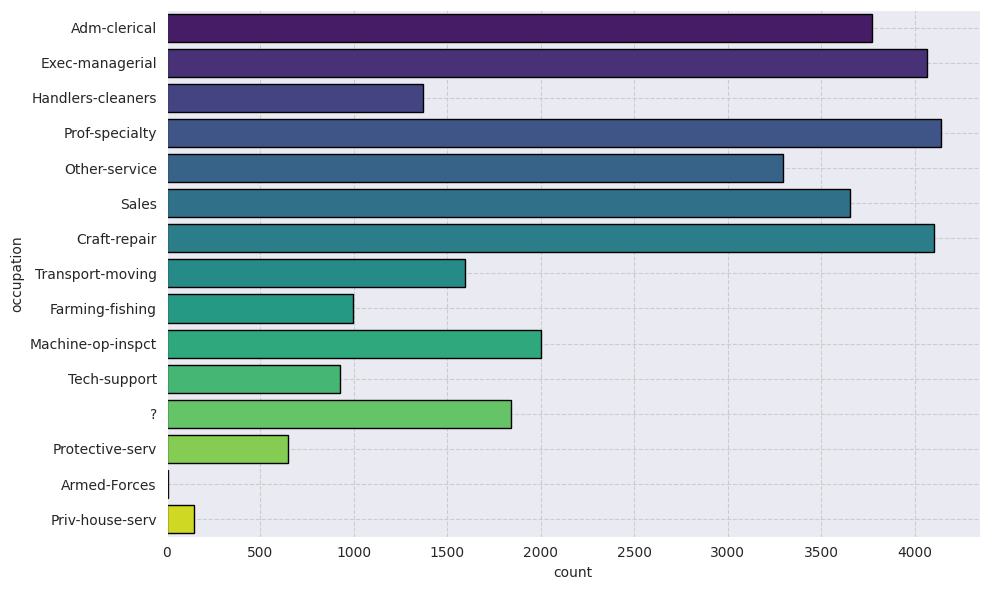

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['occupation'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Occupation vs Income

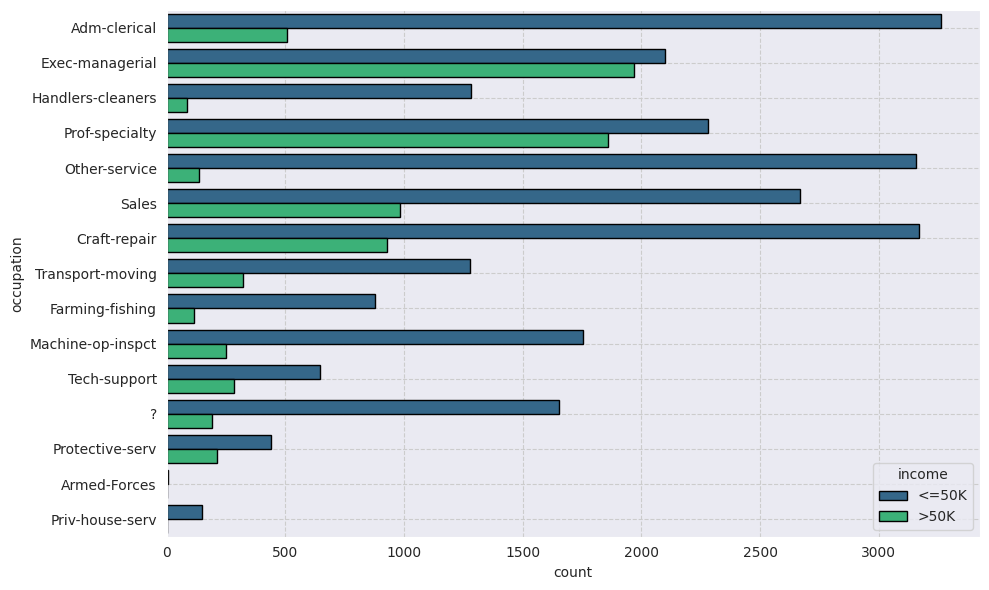

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['occupation'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Relationship

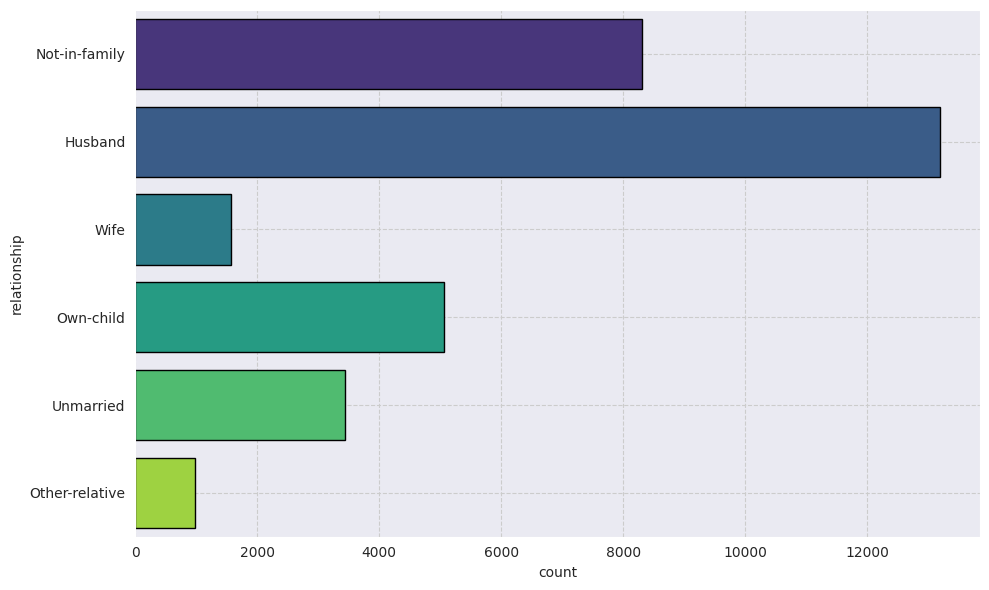

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['relationship'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Relationship vs Income

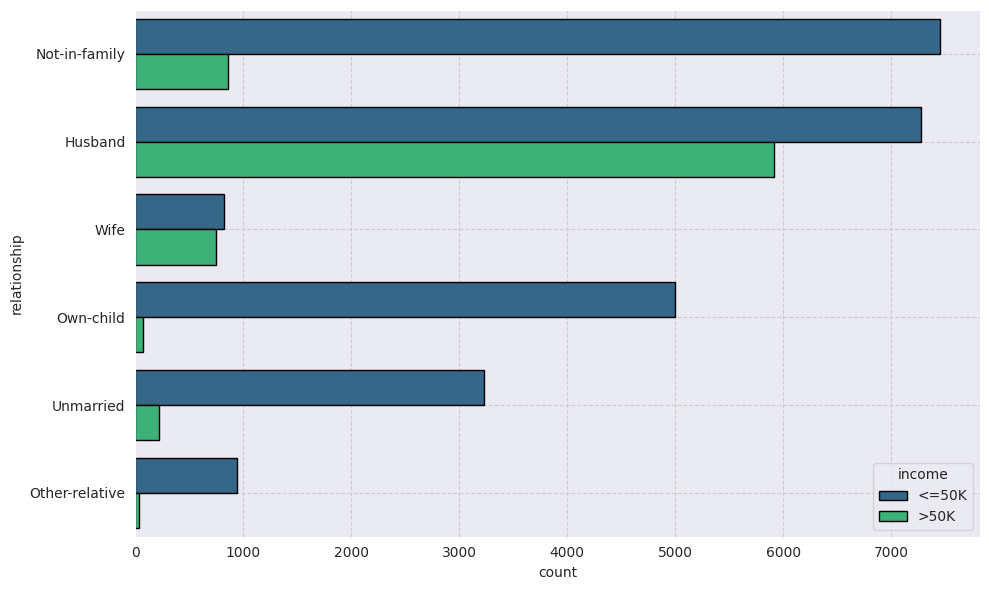

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['relationship'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Có nhiều tỷ lệ phần trăm giá trị hơn 50 nghìn trong lớp Người chồng. Và ít nhất là trong Người thân khác. Tính năng này cung cấp thông tin giống như tình trạng hôn nhân.

### Race

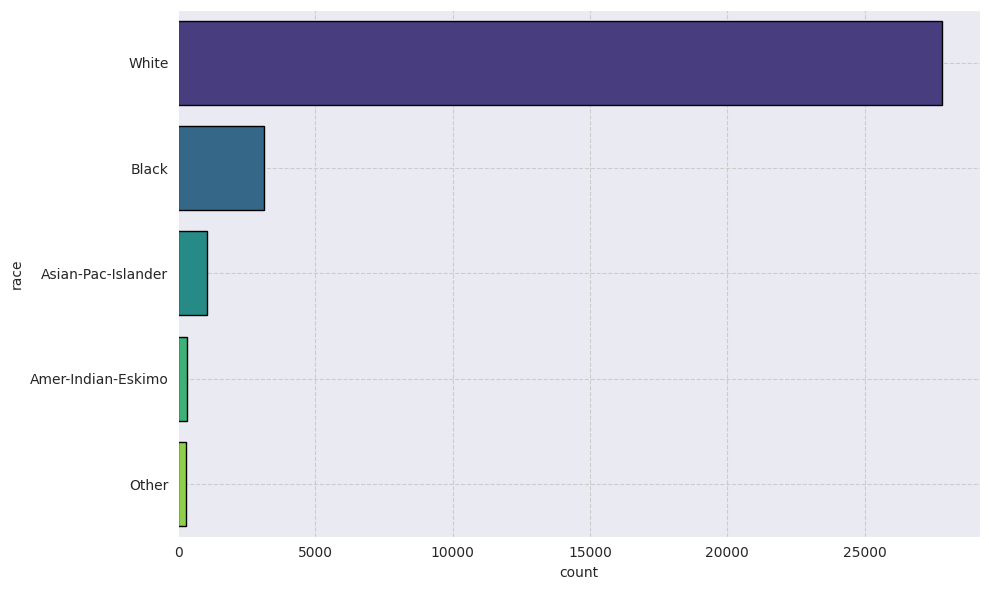

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['race'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Race vs Income

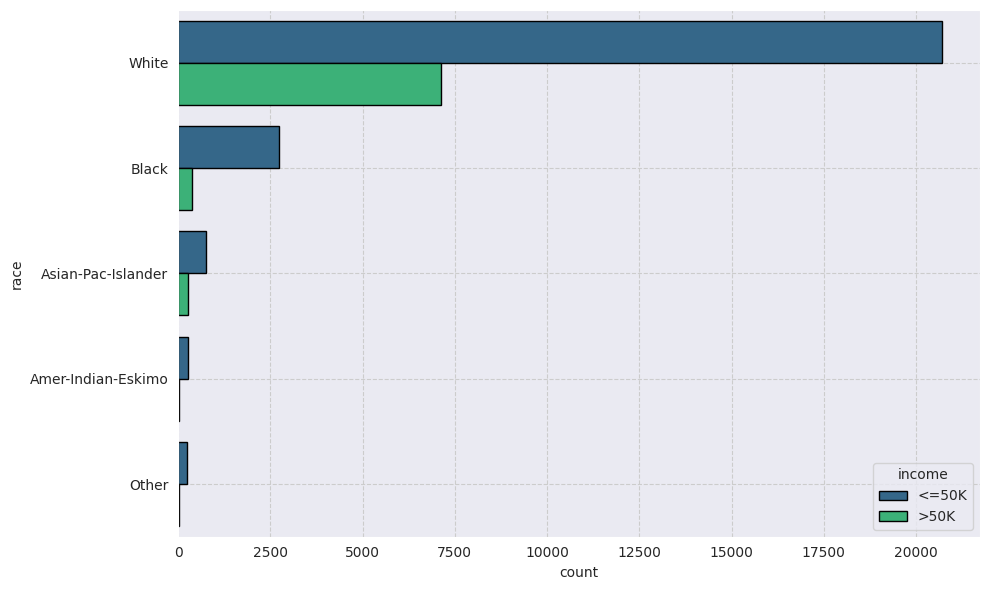

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['race'],hue=train['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Có vẻ như tính năng này có thể hữu ích trong mô hình dự đoán , vì Người da trắng và Người châu Á có tỷ lệ mục nhập lớn hơn 50.000 so với các chủng tộc còn lại. Tuy nhiên, cỡ mẫu của Người da trắng trong bộ dữ liệu lớn một cách không tương xứng so với tất cả các chủng tộc khác. Nhóm được đại diện nhiều thứ hai là Người da đen với ít hơn . Việc thiếu phân phối đồng đều khiến không sử dụng thuộc tính này trong mô hình dự đoán của mình.

### **hours-per-week**

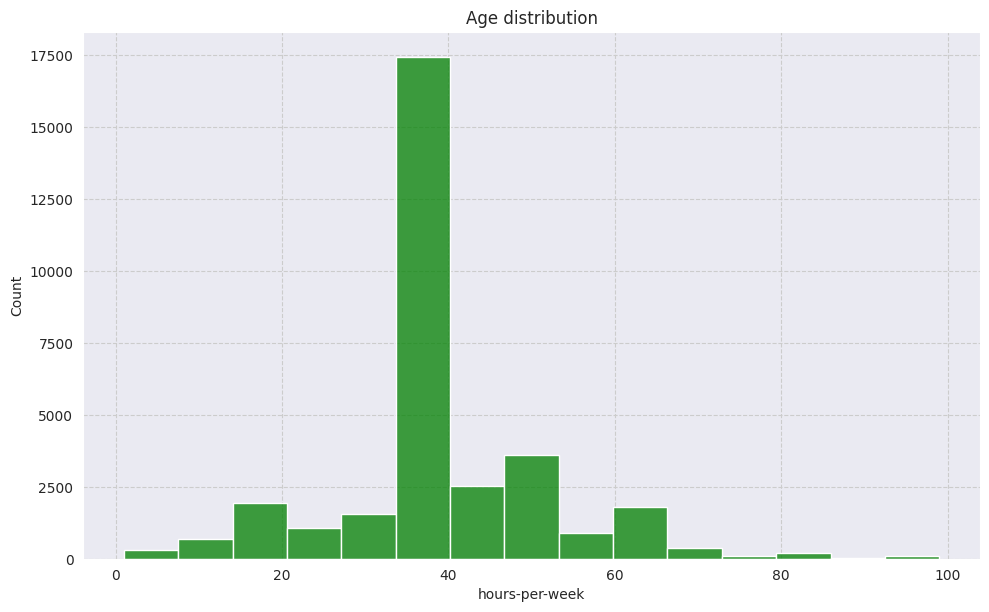

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train['hours-per-week'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

### Hours-per-week vs Income

Ta có thể thấy ở biểu đồ trên hầu hết dữ liệu đều ở đạn 40h, nên giờ ta sẽ nhóm lại để dễ quan sát

In [ ]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

t_coy = train.copy()
t_coy['hours-per-week']=t_coy['hours-per-week'].apply(hrs_edit)

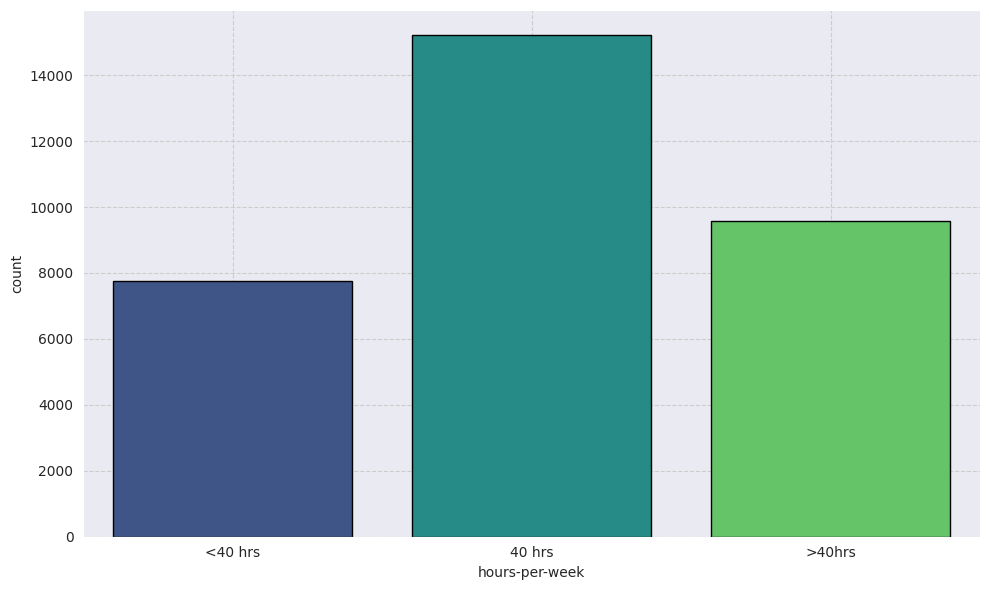

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=t_coy['hours-per-week'],palette='viridis',saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.show()

Tỷ lệ phần trăm cá nhân kiếm được trên 50.000 giảm đáng kể khi làm ít hơn 40 giờ mỗi tuần và tăng đáng kể khi làm nhiều hơn 40 giờ mỗi tuần.

### Capital-gain

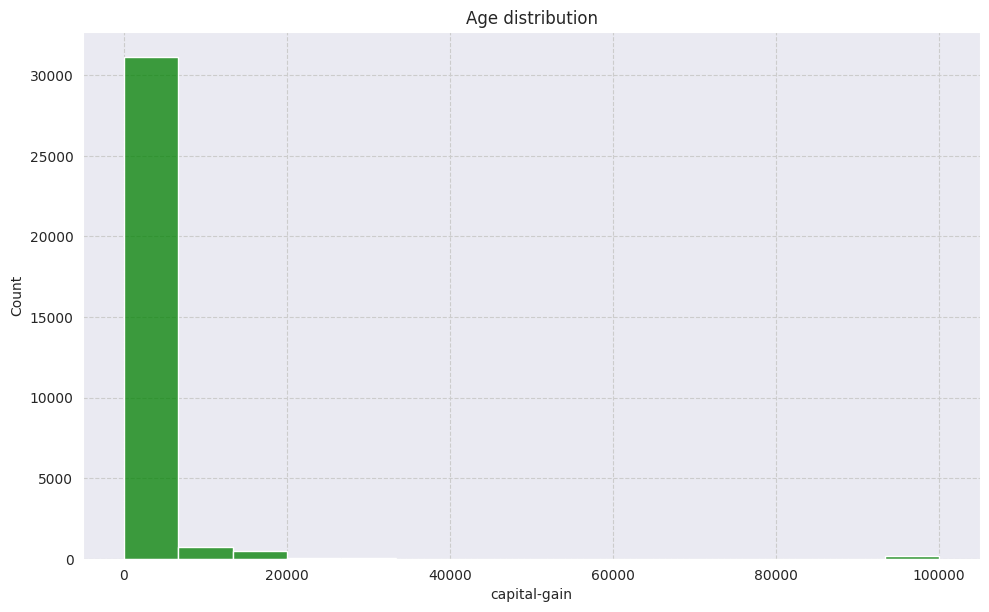

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train['capital-gain'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

*   Từ biểu đồ, chúng ta có thể thấy rằng sự phân phối lãi vốn rất sai lệch.
*   Và có những ngoại lệ ở điểm dữ liệu 100000.

### Capital-gain vs Income

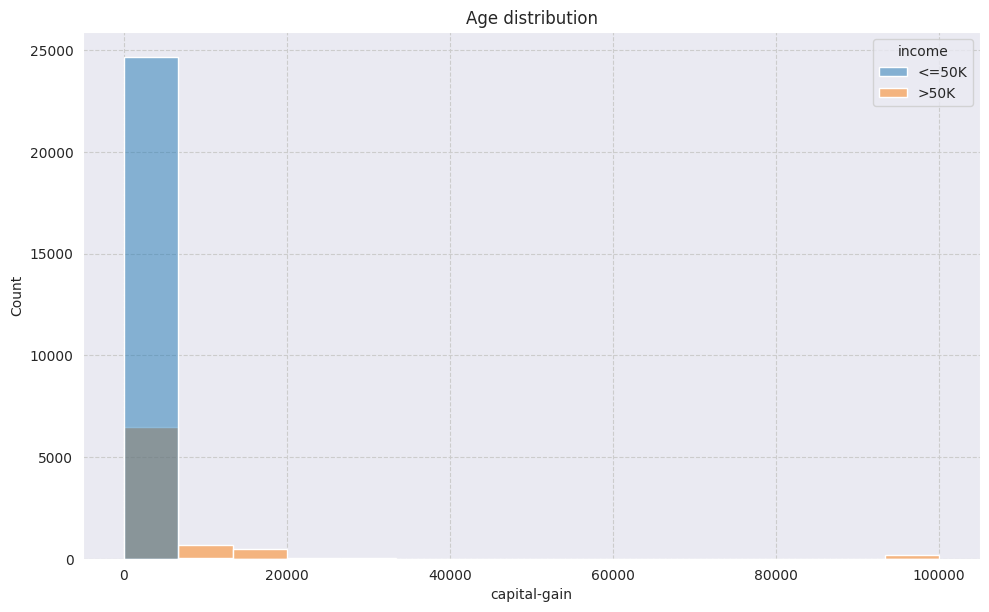

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['capital-gain'],hue=train['income'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

### Capital-loss

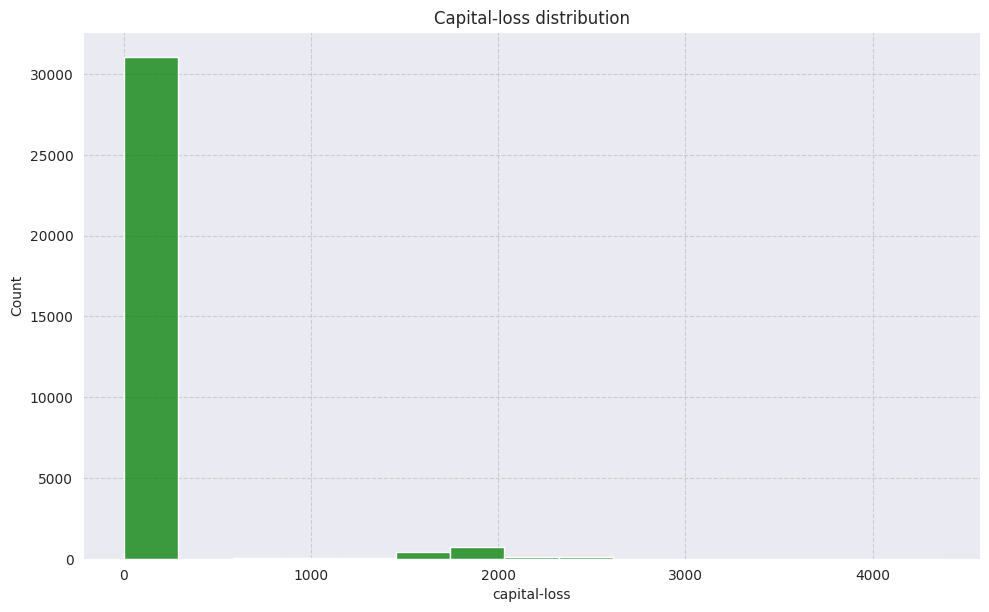

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train['capital-loss'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital-loss distribution')
plt.show()


*   Từ biểu đồ, chúng ta có thể thấy rằng dữ liệu rất không đối xứng.



### Hiển thị số liệu thống kê của tập dữ liệu đã cho

In [ ]:
train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000


##Tiền xử lý dữ liệu

### **1. Data preprocessing**

**Hiển thị số lượng dữ liệu bị thiếu**


In [7]:
printmd('## Tất cả các giá trị còn thiếu của Train')
for i,j in zip(train.columns,(train.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        display(Markdown(str(i) + ': ' + str(j) + ' mẫu'))

## Tất cả các giá trị còn thiếu của Train

workclass: 1836 mẫu

occupation: 1843 mẫu

native-country: 583 mẫu

In [8]:
printmd('## Tất cả các giá trị còn thiếu của Test')
for i,j in zip(test.columns,(test.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        display(Markdown(str(i) + ': ' + str(j) + ' mẫu'))

## Tất cả các giá trị còn thiếu của Test

workclass: 963 mẫu

occupation: 966 mẫu

native-country: 274 mẫu

### 2. Thay thế các giá trị còn thiếu ( giá trị ? )

Thay thế giá trị ? của Train
- Xử lý các giá trị thiếu trong DataFrame train. Thay thế các giá trị '?' bằng NaN, sau đó điền các giá trị NaN bằng giá trị trung bình của cột (nếu có) và cuối cùng điền các giá trị NaN còn lại bằng giá trị phổ biến nhất của cột.

In [10]:
train.replace('?', np.nan, inplace=True)
train=train.fillna(train.mean())
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
train.head()

<ipython-input-10-45b6e826bbc2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train=train.fillna(train.mean())


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Thay thế giá trị ? của Test

In [9]:
test.replace('?', np.nan, inplace=True)
test=test.fillna(test.mean())
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]))
test.head()

<ipython-input-9-4eeb8992e69c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test=test.fillna(test.mean())


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


Chuyển đổi giá trị income

In [11]:
label = train['income']
for i in range(len(label)):
    if (label[i] == '<=50K'):
        label[i] = 0
    elif (label[i]=='>50K'):
        label[i] = 1
train['income'] = label
#In dữ liệu để kiểm tra
train.head(10)

<ipython-input-11-d6fac363a76f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[i] = 0
<ipython-input-11-d6fac363a76f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[i] = 1


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [12]:
label = test['income']
for i in range(len(label)):
    if (label[i] == '<=50K'):
        label[i] = 0
    elif (label[i]=='>50K'):
        label[i] = 1
test['income'] = label
test.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Lặp lại tất cả các cột trong khung dữ liệu không phải là số và chuyển đổi chúng thành kiểu dữ liệu 'category'

In [ ]:
for col in set(train.columns) - set(train.describe().columns):
    train[col] = train[col].astype('category')

print('## 1.1. Cột dữ liệu và loại')
print(train.info())

## 1.1. Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              32561 non-null  int64   
 1   workclass        32561 non-null  category
 2   fnlwgt           32561 non-null  int64   
 3   education        32561 non-null  category
 4   educational-num  32561 non-null  int64   
 5   marital-status   32561 non-null  category
 6   occupation       32561 non-null  category
 7   relationship     32561 non-null  category
 8   race             32561 non-null  category
 9   gender           32561 non-null  category
 10  capital-gain     32561 non-null  int64   
 11  capital-loss     32561 non-null  int64   
 12  hours-per-week   32561 non-null  int64   
 13  native-country   32561 non-null  category
 14  income           32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB
None


In [13]:
# Lặp lại tất cả các cột trong khung dữ liệu không phải là số
# và chuyển đổi chúng thành kiểu dữ liệu 'category'
for col in set(test.columns) - set(test.describe().columns):
    test[col] = test[col].astype('category')

print('## 1.1. Columns and their types')
print(test.info())

## 1.1. Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              16281 non-null  int64   
 1   workclass        16281 non-null  category
 2   fnlwgt           16281 non-null  int64   
 3   education        16281 non-null  category
 4   educational-num  16281 non-null  int64   
 5   marital-status   16281 non-null  category
 6   occupation       16281 non-null  category
 7   relationship     16281 non-null  category
 8   race             16281 non-null  category
 9   gender           16281 non-null  category
 10  capital-gain     16281 non-null  int64   
 11  capital-loss     16281 non-null  int64   
 12  hours-per-week   16281 non-null  int64   
 13  native-country   16281 non-null  category
 14  income           16281 non-null  category
dtypes: category(9), int64(6)
memory usage: 910.4 KB
None


Kiểm tra xem còn giá trị null nào hay không ?

In [14]:
train.isnull().values.any()

False

In [15]:
test.isnull().values.any()

False

Xoá cột dữ liệu không cần thiết

In [23]:
del train['fnlwgt']
del train['education']
del train['race']
del train['capital-gain']
del train['capital-loss']

In [24]:
del test['fnlwgt']
del test['education']
del test['race']
del test['capital-gain']
del test['capital-loss']

In [25]:
train

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,0.301370,6,0.800000,4,0,1,1,0.397959,38,0
1,0.452055,5,0.800000,2,3,0,1,0.122449,38,0
2,0.287671,3,0.533333,0,5,1,1,0.397959,38,0
3,0.493151,3,0.400000,2,5,0,1,0.397959,38,0
4,0.150685,3,0.800000,2,9,5,0,0.397959,4,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,3,0.733333,2,12,5,0,0.377551,38,0
32557,0.315068,3,0.533333,2,6,0,1,0.397959,38,1
32558,0.561644,3,0.533333,6,0,4,0,0.397959,38,0
32559,0.068493,3,0.533333,4,0,3,1,0.193878,38,0


In [26]:
test

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,0.109589,3,0.400000,4,6,3,1,0.397959,37,0
1,0.287671,3,0.533333,2,4,0,1,0.500000,37,0
2,0.150685,1,0.733333,2,10,0,1,0.397959,37,1
3,0.369863,3,0.600000,2,6,0,1,0.397959,37,1
4,0.013699,3,0.600000,4,9,3,0,0.295918,37,0
...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,3,0.800000,0,9,1,0,0.357143,37,0
16277,0.643836,3,0.533333,6,9,2,1,0.397959,37,0
16278,0.287671,3,0.800000,2,9,0,1,0.500000,37,0
16279,0.369863,3,0.800000,0,0,3,1,0.397959,37,0


In [27]:
train.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

Chuẩn hoá

In [21]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa các biến định tính
train['workclass'] = label_encoder.fit_transform(train['workclass'])
train['marital-status'] = label_encoder.fit_transform(train['marital-status'])
train['occupation'] = label_encoder.fit_transform(train['occupation'])
train['relationship'] = label_encoder.fit_transform(train['relationship'])
train['gender'] = label_encoder.fit_transform(train['gender'])
train['native-country'] = label_encoder.fit_transform(train['native-country'])
train['income'] = label_encoder.fit_transform(train['income'])

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các biến định lượng
train[['age', 'hours-per-week', 'educational-num']] = scaler.fit_transform(train[['age', 'hours-per-week','educational-num']])


In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
# Mã hóa các biến định tính
test['workclass'] = label_encoder.fit_transform(test['workclass'])
test['marital-status'] = label_encoder.fit_transform(test['marital-status'])
test['occupation'] = label_encoder.fit_transform(test['occupation'])
test['relationship'] = label_encoder.fit_transform(test['relationship'])
test['gender'] = label_encoder.fit_transform(test['gender'])
test['native-country'] = label_encoder.fit_transform(test['native-country'])
test['income'] = label_encoder.fit_transform(test['income'])

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các biến định lượng
test[['age', 'hours-per-week', 'educational-num']] = scaler.fit_transform(test[['age', 'hours-per-week','educational-num']])

In [ ]:
train

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,0.301370,6,0.800000,4,0,1,1,0.397959,38,0
1,0.452055,5,0.800000,2,3,0,1,0.122449,38,0
2,0.287671,3,0.533333,0,5,1,1,0.397959,38,0
3,0.493151,3,0.400000,2,5,0,1,0.397959,38,0
4,0.150685,3,0.800000,2,9,5,0,0.397959,4,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,3,0.733333,2,12,5,0,0.377551,38,0
32557,0.315068,3,0.533333,2,6,0,1,0.397959,38,1
32558,0.561644,3,0.533333,6,0,4,0,0.397959,38,0
32559,0.068493,3,0.533333,4,0,3,1,0.193878,38,0


In [28]:
test

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,0.109589,3,0.400000,4,6,3,1,0.397959,37,0
1,0.287671,3,0.533333,2,4,0,1,0.500000,37,0
2,0.150685,1,0.733333,2,10,0,1,0.397959,37,1
3,0.369863,3,0.600000,2,6,0,1,0.397959,37,1
4,0.013699,3,0.600000,4,9,3,0,0.295918,37,0
...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,3,0.800000,0,9,1,0,0.357143,37,0
16277,0.643836,3,0.533333,6,9,2,1,0.397959,37,0
16278,0.287671,3,0.800000,2,9,0,1,0.500000,37,0
16279,0.369863,3,0.800000,0,0,3,1,0.397959,37,0


### 3. Feature Scalling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[['age', 'gender', 'workclass', 'hours-per-week',
                                                          'educational-num', 'native-country', 'income']], train.age, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((22792, 7), (9769, 7))

In [ ]:
scaler = RobustScaler()

X_train_scaled_ro = scaler.fit_transform(X_train) 
X_test_scaled_ro = scaler.transform(X_test)

In [ ]:
print('Mean value of age, gender, workclass, hours-per-week, education, native-country, income features: ', X_train_scaled_ro.mean(axis=0))
print('Std value of age, gender, workclass, hours-per-week, education, native-country, income features: ', X_test_scaled_ro.std(axis=0))

Mean value of age, gender, workclass, hours-per-week, education, native-country, income features:  [ 0.07988549 -0.32994033  0.09086522  0.09296244 -0.23032936 -1.57055107
  0.24039137]
Std value of age, gender, workclass, hours-per-week, education, native-country, income features:  [0.68548094 0.47121114 1.11103377 2.49670578 1.30047412 6.02956803
 0.42816485]


Tạo ma trận các biểu đồ phân tán (scatter plots) và histogram cho các cặp biến trong tập dữ liệu "train". Nó giúp hiển thị tương quan giữa các cặp biến và phân phối của từng biến trong tập dữ liệu.

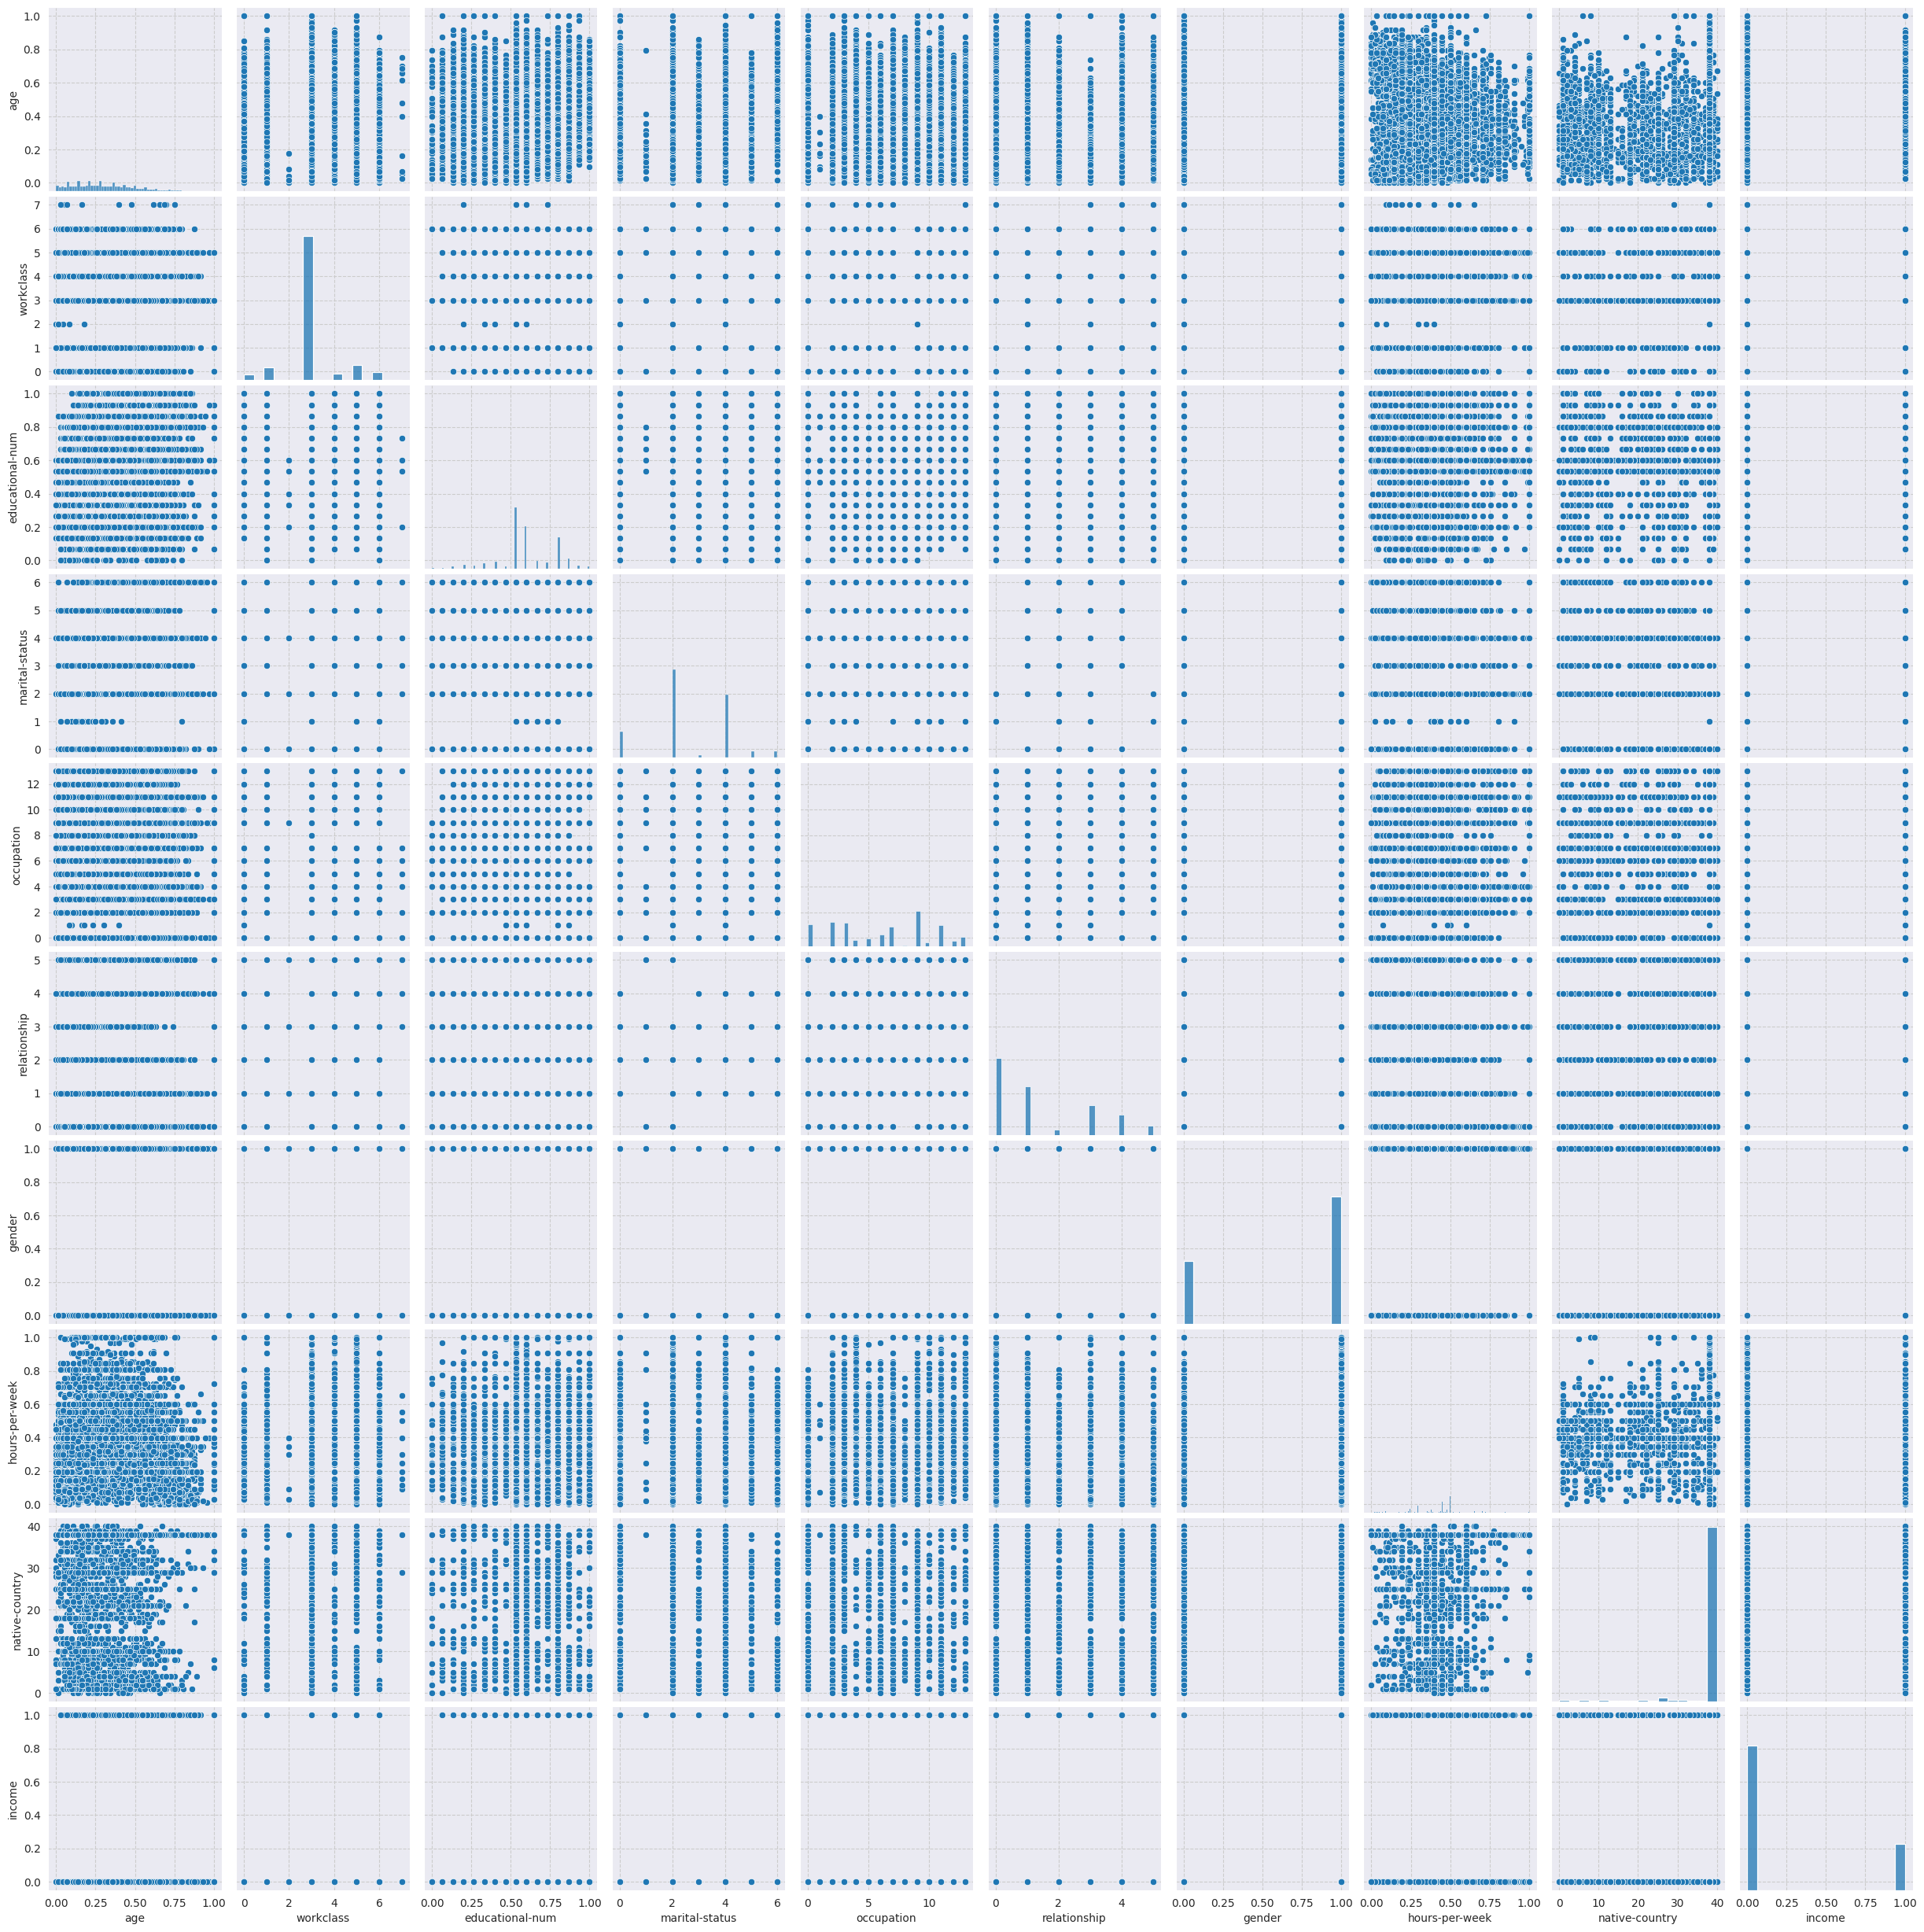

In [ ]:
sns.pairplot(train)

Hàm sns.heatmap nhận đầu vào là một ma trận dữ liệu và hiển thị các ô của ma trận bằng các màu sắc tương ứng với giá trị của mỗi ô. Heatmap thường được sử dụng để thể hiện mối quan hệ, tương quan hoặc phân phối của các biến trong một ma trận dữ liệu.

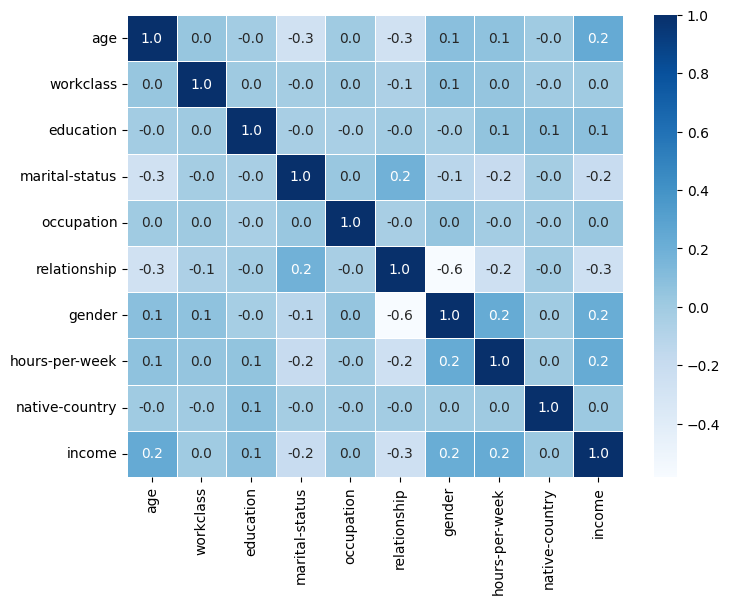

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(train.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

## Phát triển mô hình

### 0.1. Data Splitting

In [ ]:
# Chia X và y cho tập train
X_train = train.drop('income', axis=1)  # Thay 'target_variable_name' bằng tên cột chứa biến mục tiêu
y_train = train['income']  # Thay 'target_variable_name' bằng tên cột chứa biến mục tiêu

# Chia X và y cho tập test
X_test = test.drop('income', axis=1)  # Thay 'target_variable_name' bằng tên cột chứa biến mục tiêu
y_test = test['income']  # Thay 'target_variable_name' bằng tên cột chứa biến mục tiêu


Kích thước tập train và test

In [ ]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (32561, 9)
X_test:  (16281, 9)
y_train:  (32561,)
y_test:  (16281,)


**Neural, Svm, Knn, NB, RDF, DT**

### **Neural networks**

In [ ]:
# Determine the number of classes
num_classes = len(np.unique(y_train))
# Define the function to create the model
def create_model(n_layer=2, n_node=256, lr=0.001):
    model = Sequential()
    model.add(Flatten())
    for _ in range(n_layer):
        model.add(Dense(n_node))
        model.add(Activation('tanh'))
        model.add(Dropout(0.1))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to search
param_grid = {'n_layer': [1, 2],
              'n_node': [256, 512],
              'lr': [0.01, 0.001]}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64)

# Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, refit=True)
grid_result = grid.fit(X_train, y_train)
# Best hyperparameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Predict using the best model
y_pred = grid_result.predict(X_test)


<ipython-input-32-8cf310a6c476>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
407/407 [==============================] - 4s 4ms/step - loss: 0.4964 - accuracy: 0.7611
Epoch 2/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.7919
Epoch 3/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.7985
Epoch 4/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.8010
Epoch 5/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8004
Epoch 6/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.7988
Epoch 7/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.7977
Epoch 8/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8044
Epoch 9/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.7988
Epoch 10/10
102/102 [==============================] - 1s 1ms/step - loss: 0.4380 - accuracy: 0.8032

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7643
Epoch 2/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.7922
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4300 - accuracy: 0.7912
Epoch 4/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.7964
Epoch 5/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8025
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8016
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.7940
Epoch 8/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4571 - accuracy: 0.7919
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8008
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8222
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.4994 - accuracy: 0.7620
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7900
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4361 - accuracy: 0.7927
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.7953
Epoch 5/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4256 - accuracy: 0.7995
Epoch 6/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.7923
Epoch 7/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.8024
Epoch 8/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7957
Epoch 9/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4172 - accuracy: 0.8024
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7300
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 2ms/step - loss: 0.5193 - accuracy: 0.7530
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.7803
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.7929
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.7919
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4180 - accuracy: 0.7991
Epoch 6/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.8006
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8067
Epoch 8/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.7940
Epoch 9/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8015
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 1.0951 - accuracy: 0.5771


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
408/408 [==============================] - 2s 3ms/step - loss: 0.5075 - accuracy: 0.7576
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.7823
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.7917
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.7967
Epoch 5/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7909
Epoch 6/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.7987
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7981
Epoch 8/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8025
Epoch 9/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4135 - accuracy: 0.8022
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7551

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 2s 4ms/step - loss: 0.5451 - accuracy: 0.7537
Epoch 2/10
407/407 [==============================] - 2s 5ms/step - loss: 0.4552 - accuracy: 0.7832
Epoch 3/10
407/407 [==============================] - 2s 5ms/step - loss: 0.4372 - accuracy: 0.7891
Epoch 4/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.7923
Epoch 5/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.7976
Epoch 6/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.7967
Epoch 7/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4372 - accuracy: 0.7971
Epoch 8/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.7940
Epoch 9/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.7970
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8042
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.5315 - accuracy: 0.7563
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4404 - accuracy: 0.7887
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.7965
Epoch 4/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4460 - accuracy: 0.7919
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.7930
Epoch 6/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4659 - accuracy: 0.7859
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.7986
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4684 - accuracy: 0.7894
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4749 - accuracy: 0.7889
Epoch 10/10
102/102 [==============================] - 1s 3ms/step - loss: 1.5570 - accuracy: 0.7632
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5563 - accuracy: 0.7498
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7849
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4951 - accuracy: 0.7807
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.7940
Epoch 5/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4711 - accuracy: 0.7891
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.7823
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4878 - accuracy: 0.7828
Epoch 8/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4493 - accuracy: 0.7932
Epoch 9/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4195 - accuracy: 0.8059
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8194
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5292 - accuracy: 0.7535
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.7790
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.7970
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.7856
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7808
Epoch 6/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4562 - accuracy: 0.7897
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4665 - accuracy: 0.7881
Epoch 8/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4314 - accuracy: 0.7954
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4438 - accuracy: 0.7940
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 1.1210 - accuracy: 0.7577
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5470 - accuracy: 0.7504
Epoch 2/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.7861
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.7832
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.7973
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.5361 - accuracy: 0.7745
Epoch 6/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4563 - accuracy: 0.7909
Epoch 7/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4600 - accuracy: 0.7876
Epoch 8/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4501 - accuracy: 0.7923
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4469 - accuracy: 0.7914
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.8897 - accuracy: 0.7551
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 4s 7ms/step - loss: 0.6261 - accuracy: 0.7411
Epoch 2/10
407/407 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7396
Epoch 3/10
407/407 [==============================] - 2s 4ms/step - loss: 0.5600 - accuracy: 0.7411
Epoch 4/10
407/407 [==============================] - 2s 4ms/step - loss: 0.5440 - accuracy: 0.7459
Epoch 5/10
407/407 [==============================] - 2s 5ms/step - loss: 0.5648 - accuracy: 0.7391
Epoch 6/10
407/407 [==============================] - 2s 4ms/step - loss: 0.5450 - accuracy: 0.7388
Epoch 7/10
407/407 [==============================] - 2s 5ms/step - loss: 0.5188 - accuracy: 0.7385
Epoch 8/10
407/407 [==============================] - 3s 6ms/step - loss: 0.5207 - accuracy: 0.7444
Epoch 9/10
407/407 [==============================] - 2s 5ms/step - loss: 0.5110 - accuracy: 0.7433
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7586
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.6533 - accuracy: 0.7336
Epoch 2/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5902 - accuracy: 0.7408
Epoch 3/10
408/408 [==============================] - 2s 5ms/step - loss: 0.6333 - accuracy: 0.7327
Epoch 4/10
408/408 [==============================] - 3s 6ms/step - loss: 0.5798 - accuracy: 0.7468
Epoch 5/10
408/408 [==============================] - 2s 6ms/step - loss: 0.6049 - accuracy: 0.7370
Epoch 6/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5819 - accuracy: 0.7471
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.6206 - accuracy: 0.7259
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5429 - accuracy: 0.7410
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5227 - accuracy: 0.7404
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7632
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 7ms/step - loss: 0.6677 - accuracy: 0.7333
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5860 - accuracy: 0.7367
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5549 - accuracy: 0.7423
Epoch 4/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5761 - accuracy: 0.7448
Epoch 5/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5849 - accuracy: 0.7444
Epoch 6/10
408/408 [==============================] - 2s 5ms/step - loss: 0.6256 - accuracy: 0.7355
Epoch 7/10
408/408 [==============================] - 3s 7ms/step - loss: 0.6027 - accuracy: 0.7446
Epoch 8/10
408/408 [==============================] - 3s 6ms/step - loss: 0.6021 - accuracy: 0.7373
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5993 - accuracy: 0.7411
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7621
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.6713 - accuracy: 0.7305
Epoch 2/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5341 - accuracy: 0.7479
Epoch 3/10
408/408 [==============================] - 3s 7ms/step - loss: 0.5268 - accuracy: 0.7407
Epoch 4/10
408/408 [==============================] - 2s 6ms/step - loss: 0.5163 - accuracy: 0.7400
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5413 - accuracy: 0.7436
Epoch 6/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5982 - accuracy: 0.7434
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5933 - accuracy: 0.7455
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.6004 - accuracy: 0.7378
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5477 - accuracy: 0.7529
Epoch 10/10
102/102 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7577
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.6520 - accuracy: 0.7370
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5873 - accuracy: 0.7494
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5583 - accuracy: 0.7438
Epoch 4/10
408/408 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.7418
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5152 - accuracy: 0.7440
Epoch 6/10
408/408 [==============================] - 2s 4ms/step - loss: 0.5203 - accuracy: 0.7461
Epoch 7/10
408/408 [==============================] - 3s 7ms/step - loss: 0.5577 - accuracy: 0.7383
Epoch 8/10
408/408 [==============================] - 2s 6ms/step - loss: 0.5858 - accuracy: 0.7500
Epoch 9/10
408/408 [==============================] - 2s 5ms/step - loss: 0.6008 - accuracy: 0.7423
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7543
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 4s 8ms/step - loss: 0.7120 - accuracy: 0.7129
Epoch 2/10
407/407 [==============================] - 5s 12ms/step - loss: 0.6539 - accuracy: 0.7152
Epoch 3/10
407/407 [==============================] - 3s 8ms/step - loss: 0.6432 - accuracy: 0.7130
Epoch 4/10
407/407 [==============================] - 3s 7ms/step - loss: 0.6283 - accuracy: 0.7262
Epoch 5/10
407/407 [==============================] - 3s 8ms/step - loss: 0.6286 - accuracy: 0.7183
Epoch 6/10
407/407 [==============================] - 5s 12ms/step - loss: 0.6243 - accuracy: 0.7217
Epoch 7/10
407/407 [==============================] - 3s 8ms/step - loss: 0.6166 - accuracy: 0.7311
Epoch 8/10
407/407 [==============================] - 3s 8ms/step - loss: 0.6563 - accuracy: 0.7087
Epoch 9/10
407/407 [==============================] - 3s 8ms/step - loss: 0.6356 - accuracy: 0.7187
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7586
Epoch 1/

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 8ms/step - loss: 0.6977 - accuracy: 0.7254
Epoch 2/10
408/408 [==============================] - 4s 11ms/step - loss: 0.6520 - accuracy: 0.7098
Epoch 3/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6440 - accuracy: 0.7255
Epoch 4/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6264 - accuracy: 0.7253
Epoch 5/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6403 - accuracy: 0.7201
Epoch 6/10
408/408 [==============================] - 5s 13ms/step - loss: 0.6147 - accuracy: 0.7314
Epoch 7/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6188 - accuracy: 0.7267
Epoch 8/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6239 - accuracy: 0.7216
Epoch 9/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6513 - accuracy: 0.7029
Epoch 10/10
102/102 [==============================] - 1s 3ms/step - loss: 1.6562 - accuracy: 0.2368
Epoch 1/

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 8ms/step - loss: 0.7111 - accuracy: 0.7086
Epoch 2/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6452 - accuracy: 0.7146
Epoch 3/10
408/408 [==============================] - 5s 11ms/step - loss: 0.6526 - accuracy: 0.7093
Epoch 4/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6220 - accuracy: 0.7303
Epoch 5/10
408/408 [==============================] - 3s 9ms/step - loss: 0.6270 - accuracy: 0.7180
Epoch 6/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6299 - accuracy: 0.7208
Epoch 7/10
408/408 [==============================] - 4s 11ms/step - loss: 0.6384 - accuracy: 0.7151
Epoch 8/10
408/408 [==============================] - 4s 10ms/step - loss: 0.6935 - accuracy: 0.7139
Epoch 9/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6221 - accuracy: 0.7261
Epoch 10/10
102/102 [==============================] - 1s 3ms/step - loss: 0.7254 - accuracy: 0.7621
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 9ms/step - loss: 0.6633 - accuracy: 0.7222
Epoch 2/10
408/408 [==============================] - 4s 9ms/step - loss: 0.5929 - accuracy: 0.7276
Epoch 3/10
408/408 [==============================] - 5s 12ms/step - loss: 0.6397 - accuracy: 0.7208
Epoch 4/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6371 - accuracy: 0.7139
Epoch 5/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6751 - accuracy: 0.7085
Epoch 6/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6423 - accuracy: 0.7193
Epoch 7/10
408/408 [==============================] - 4s 11ms/step - loss: 0.6341 - accuracy: 0.7188
Epoch 8/10
408/408 [==============================] - 4s 10ms/step - loss: 0.6850 - accuracy: 0.7002
Epoch 9/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6381 - accuracy: 0.7234
Epoch 10/10
102/102 [==============================] - 1s 4ms/step - loss: 0.6861 - accuracy: 0.7577
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 5s 11ms/step - loss: 0.7574 - accuracy: 0.7203
Epoch 2/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6694 - accuracy: 0.7261
Epoch 3/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6224 - accuracy: 0.7239
Epoch 4/10
408/408 [==============================] - 5s 12ms/step - loss: 0.6082 - accuracy: 0.7349
Epoch 5/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6341 - accuracy: 0.7223
Epoch 6/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6197 - accuracy: 0.7264
Epoch 7/10
408/408 [==============================] - 4s 9ms/step - loss: 0.6632 - accuracy: 0.7063
Epoch 8/10
408/408 [==============================] - 5s 12ms/step - loss: 0.6592 - accuracy: 0.7132
Epoch 9/10
408/408 [==============================] - 3s 8ms/step - loss: 0.6215 - accuracy: 0.7239
Epoch 10/10
102/102 [==============================] - 1s 4ms/step - loss: 0.7081 - accuracy: 0.7543
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 3s 3ms/step - loss: 0.5076 - accuracy: 0.7564
Epoch 2/10
407/407 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.7962
Epoch 3/10
407/407 [==============================] - 2s 4ms/step - loss: 0.4050 - accuracy: 0.8066
Epoch 4/10
407/407 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8099
Epoch 5/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3915 - accuracy: 0.8140
Epoch 6/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8145
Epoch 7/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8141
Epoch 8/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8143
Epoch 9/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.8128
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8150
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5025 - accuracy: 0.7549
Epoch 2/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.7896
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4010 - accuracy: 0.8065
Epoch 4/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3923 - accuracy: 0.8132
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8116
Epoch 6/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8133
Epoch 7/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8149
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3855 - accuracy: 0.8172
Epoch 9/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.8114
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8050
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7492
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4433 - accuracy: 0.7860
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8006
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4010 - accuracy: 0.8081
Epoch 5/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8092
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8137
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3896 - accuracy: 0.8109
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3879 - accuracy: 0.8135
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3874 - accuracy: 0.8134
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8137
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 4ms/step - loss: 0.5169 - accuracy: 0.7501
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4327 - accuracy: 0.7885
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.7997
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.8086
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8102
Epoch 6/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8127
Epoch 7/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8107
Epoch 8/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3872 - accuracy: 0.8120
Epoch 9/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8130
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8053
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7578
Epoch 2/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.7904
Epoch 3/10
408/408 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8043
Epoch 4/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8095
Epoch 5/10
408/408 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8081
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8126
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3904 - accuracy: 0.8125
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3893 - accuracy: 0.8133
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3879 - accuracy: 0.8150
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8213
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 2s 3ms/step - loss: 0.5221 - accuracy: 0.7483
Epoch 2/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4311 - accuracy: 0.7907
Epoch 3/10
407/407 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8073
Epoch 4/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8116
Epoch 5/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8100
Epoch 6/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8122
Epoch 7/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3887 - accuracy: 0.8127
Epoch 8/10
407/407 [==============================] - 2s 6ms/step - loss: 0.3894 - accuracy: 0.8120
Epoch 9/10
407/407 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8145
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8087
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 5ms/step - loss: 0.5107 - accuracy: 0.7540
Epoch 2/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4362 - accuracy: 0.7909
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3986 - accuracy: 0.8066
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8050
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8096
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8111
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8130
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8127
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8151
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.7991
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.7528
Epoch 2/10
408/408 [==============================] - 1s 4ms/step - loss: 0.4307 - accuracy: 0.7907
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8010
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8098
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3924 - accuracy: 0.8113
Epoch 6/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3949 - accuracy: 0.8087
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3897 - accuracy: 0.8127
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3862 - accuracy: 0.8133
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8128
Epoch 10/10
102/102 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8223
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.5055 - accuracy: 0.7560
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4264 - accuracy: 0.7941
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8051
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8051
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8086
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8076
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3914 - accuracy: 0.8125
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8109
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8150
Epoch 10/10
102/102 [==============================] - 1s 4ms/step - loss: 0.3707 - accuracy: 0.8277
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 3ms/step - loss: 0.4949 - accuracy: 0.7628
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.7965
Epoch 3/10
408/408 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 0.8054
Epoch 4/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8090
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8092
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8102
Epoch 7/10
408/408 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.8088
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8130
Epoch 9/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3925 - accuracy: 0.8113
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8200
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.7454
Epoch 2/10
407/407 [==============================] - 2s 6ms/step - loss: 0.4342 - accuracy: 0.7870
Epoch 3/10
407/407 [==============================] - 3s 6ms/step - loss: 0.4105 - accuracy: 0.7992
Epoch 4/10
407/407 [==============================] - 2s 6ms/step - loss: 0.4013 - accuracy: 0.8040
Epoch 5/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3947 - accuracy: 0.8090
Epoch 6/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8129
Epoch 7/10
407/407 [==============================] - 2s 5ms/step - loss: 0.3870 - accuracy: 0.8151
Epoch 8/10
407/407 [==============================] - 2s 5ms/step - loss: 0.3853 - accuracy: 0.8132
Epoch 9/10
407/407 [==============================] - 2s 5ms/step - loss: 0.3793 - accuracy: 0.8192
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8260
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.5170 - accuracy: 0.7483
Epoch 2/10
408/408 [==============================] - 2s 6ms/step - loss: 0.4229 - accuracy: 0.7910
Epoch 3/10
408/408 [==============================] - 3s 7ms/step - loss: 0.4109 - accuracy: 0.7979
Epoch 4/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4017 - accuracy: 0.8043
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3905 - accuracy: 0.8088
Epoch 6/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3916 - accuracy: 0.8089
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3902 - accuracy: 0.8123
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3874 - accuracy: 0.8112
Epoch 9/10
408/408 [==============================] - 3s 6ms/step - loss: 0.3820 - accuracy: 0.8137
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8022
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 2s 5ms/step - loss: 0.5136 - accuracy: 0.7479
Epoch 2/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4318 - accuracy: 0.7881
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4140 - accuracy: 0.7978
Epoch 4/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3988 - accuracy: 0.8053
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3938 - accuracy: 0.8092
Epoch 6/10
408/408 [==============================] - 3s 7ms/step - loss: 0.3908 - accuracy: 0.8104
Epoch 7/10
408/408 [==============================] - 3s 6ms/step - loss: 0.3897 - accuracy: 0.8102
Epoch 8/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3862 - accuracy: 0.8134
Epoch 9/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3836 - accuracy: 0.8137
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8203
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.5085 - accuracy: 0.7560
Epoch 2/10
408/408 [==============================] - 2s 6ms/step - loss: 0.4309 - accuracy: 0.7856
Epoch 3/10
408/408 [==============================] - 3s 6ms/step - loss: 0.4133 - accuracy: 0.7948
Epoch 4/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4054 - accuracy: 0.7992
Epoch 5/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4031 - accuracy: 0.8052
Epoch 6/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3955 - accuracy: 0.8053
Epoch 7/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3904 - accuracy: 0.8063
Epoch 8/10
408/408 [==============================] - 2s 4ms/step - loss: 0.3845 - accuracy: 0.8131
Epoch 9/10
408/408 [==============================] - 2s 6ms/step - loss: 0.3899 - accuracy: 0.8097
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8314
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 3s 5ms/step - loss: 0.5244 - accuracy: 0.7447
Epoch 2/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4453 - accuracy: 0.7797
Epoch 3/10
408/408 [==============================] - 2s 5ms/step - loss: 0.4095 - accuracy: 0.7988
Epoch 4/10
408/408 [==============================] - 2s 4ms/step - loss: 0.4013 - accuracy: 0.8037
Epoch 5/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3972 - accuracy: 0.8061
Epoch 6/10
408/408 [==============================] - 3s 7ms/step - loss: 0.3891 - accuracy: 0.8105
Epoch 7/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3896 - accuracy: 0.8128
Epoch 8/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3864 - accuracy: 0.8127
Epoch 9/10
408/408 [==============================] - 2s 5ms/step - loss: 0.3812 - accuracy: 0.8158
Epoch 10/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8232
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


407/407 [==============================] - 5s 10ms/step - loss: 0.5210 - accuracy: 0.7529
Epoch 2/10
407/407 [==============================] - 4s 10ms/step - loss: 0.4336 - accuracy: 0.7842
Epoch 3/10
407/407 [==============================] - 4s 9ms/step - loss: 0.4136 - accuracy: 0.7961
Epoch 4/10
407/407 [==============================] - 3s 7ms/step - loss: 0.4052 - accuracy: 0.8023
Epoch 5/10
407/407 [==============================] - 4s 11ms/step - loss: 0.3943 - accuracy: 0.8072
Epoch 6/10
407/407 [==============================] - 4s 9ms/step - loss: 0.3914 - accuracy: 0.8090
Epoch 7/10
407/407 [==============================] - 3s 7ms/step - loss: 0.3850 - accuracy: 0.8145
Epoch 8/10
407/407 [==============================] - 3s 7ms/step - loss: 0.3896 - accuracy: 0.8120
Epoch 9/10
407/407 [==============================] - 4s 9ms/step - loss: 0.3820 - accuracy: 0.8160
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8164
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 5s 10ms/step - loss: 0.5367 - accuracy: 0.7444
Epoch 2/10
408/408 [==============================] - 4s 11ms/step - loss: 0.4344 - accuracy: 0.7824
Epoch 3/10
408/408 [==============================] - 4s 9ms/step - loss: 0.4085 - accuracy: 0.7985
Epoch 4/10
408/408 [==============================] - 4s 9ms/step - loss: 0.3991 - accuracy: 0.8055
Epoch 5/10
408/408 [==============================] - 4s 10ms/step - loss: 0.4001 - accuracy: 0.8039
Epoch 6/10
408/408 [==============================] - 4s 10ms/step - loss: 0.3895 - accuracy: 0.8092
Epoch 7/10
408/408 [==============================] - 4s 9ms/step - loss: 0.3902 - accuracy: 0.8102
Epoch 8/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3967 - accuracy: 0.8081
Epoch 9/10
408/408 [==============================] - 4s 10ms/step - loss: 0.3879 - accuracy: 0.8105
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8200
Epoch

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 5s 9ms/step - loss: 0.5460 - accuracy: 0.7478
Epoch 2/10
408/408 [==============================] - 5s 11ms/step - loss: 0.4404 - accuracy: 0.7826
Epoch 3/10
408/408 [==============================] - 4s 10ms/step - loss: 0.4302 - accuracy: 0.7887
Epoch 4/10
408/408 [==============================] - 3s 8ms/step - loss: 0.4049 - accuracy: 0.8006
Epoch 5/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3929 - accuracy: 0.8076
Epoch 6/10
408/408 [==============================] - 5s 13ms/step - loss: 0.3928 - accuracy: 0.8074
Epoch 7/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3903 - accuracy: 0.8092
Epoch 8/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3856 - accuracy: 0.8112
Epoch 9/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3848 - accuracy: 0.8112
Epoch 10/10
102/102 [==============================] - 1s 4ms/step - loss: 0.4544 - accuracy: 0.7650
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 9ms/step - loss: 0.5335 - accuracy: 0.7485
Epoch 2/10
408/408 [==============================] - 4s 9ms/step - loss: 0.4409 - accuracy: 0.7786
Epoch 3/10
408/408 [==============================] - 5s 11ms/step - loss: 0.4355 - accuracy: 0.7864
Epoch 4/10
408/408 [==============================] - 3s 8ms/step - loss: 0.4109 - accuracy: 0.7978
Epoch 5/10
408/408 [==============================] - 3s 8ms/step - loss: 0.4084 - accuracy: 0.7977
Epoch 6/10
408/408 [==============================] - 4s 9ms/step - loss: 0.3913 - accuracy: 0.8087
Epoch 7/10
408/408 [==============================] - 5s 11ms/step - loss: 0.3923 - accuracy: 0.8067
Epoch 8/10
408/408 [==============================] - 4s 9ms/step - loss: 0.3963 - accuracy: 0.8085
Epoch 9/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3814 - accuracy: 0.8156
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8113
Epoch 1/

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


408/408 [==============================] - 4s 8ms/step - loss: 0.5331 - accuracy: 0.7498
Epoch 2/10
408/408 [==============================] - 4s 10ms/step - loss: 0.4414 - accuracy: 0.7799
Epoch 3/10
408/408 [==============================] - 5s 12ms/step - loss: 0.4111 - accuracy: 0.7960
Epoch 4/10
408/408 [==============================] - 3s 8ms/step - loss: 0.4137 - accuracy: 0.7944
Epoch 5/10
408/408 [==============================] - 3s 8ms/step - loss: 0.3982 - accuracy: 0.8059
Epoch 6/10
408/408 [==============================] - 4s 10ms/step - loss: 0.3909 - accuracy: 0.8079
Epoch 7/10
408/408 [==============================] - 4s 10ms/step - loss: 0.3921 - accuracy: 0.8075
Epoch 8/10
408/408 [==============================] - 4s 9ms/step - loss: 0.3928 - accuracy: 0.8071
Epoch 9/10
408/408 [==============================] - 4s 10ms/step - loss: 0.3857 - accuracy: 0.8118
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8156
Epoch

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


509/509 [==============================] - 3s 5ms/step - loss: 0.5032 - accuracy: 0.7582
Epoch 2/10
509/509 [==============================] - 2s 5ms/step - loss: 0.4207 - accuracy: 0.7921
Epoch 3/10
509/509 [==============================] - 2s 5ms/step - loss: 0.4029 - accuracy: 0.8022
Epoch 4/10
509/509 [==============================] - 4s 7ms/step - loss: 0.3943 - accuracy: 0.8089
Epoch 5/10
509/509 [==============================] - 3s 5ms/step - loss: 0.3910 - accuracy: 0.8086
Epoch 6/10
509/509 [==============================] - 2s 5ms/step - loss: 0.3845 - accuracy: 0.8130
Epoch 7/10
509/509 [==============================] - 2s 4ms/step - loss: 0.3824 - accuracy: 0.8148
Epoch 8/10
509/509 [==============================] - 2s 5ms/step - loss: 0.3804 - accuracy: 0.8167
Epoch 9/10
509/509 [==============================] - 4s 7ms/step - loss: 0.3795 - accuracy: 0.8159
Epoch 10/10
509/509 [==============================] - 3s 6ms/step - loss: 0.3778 - accuracy: 0.8161
Best Hyper

In [ ]:
# Tính toán các độ đo đánh giá
accuracy_neural = accuracy_score(y_test, y_pred)
f1_neural = f1_score(y_test, y_pred)
precision_neural = precision_score(y_test, y_pred)
recall_neural = recall_score(y_test, y_pred)

# In kết quả
print("Accuracy:", accuracy_neural)
print("F1 Score:", f1_neural)
print("Precision:", precision_neural)
print("Recall:", recall_neural)

Accuracy: 0.8167188747619925
F1 Score: 0.6192906353661649
Precision: 0.6079659318637275
Recall: 0.6310452418096724


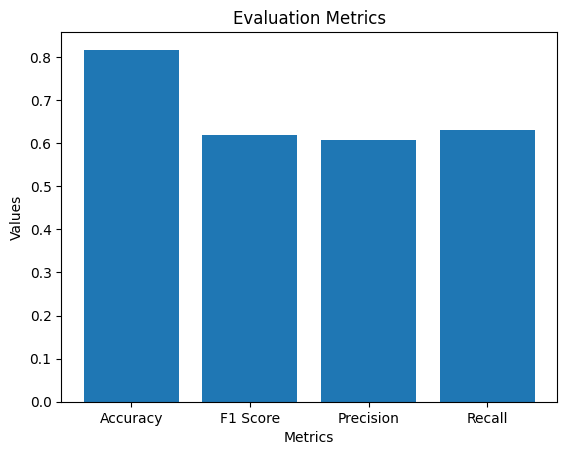

In [ ]:
# Các giá trị đánh giá
values = [accuracy_neural, f1_neural, precision_neural, recall_neural]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()


Mô hình Neural Network đạt độ chính xác (**Accuracy**) khoảng 81.672%, cho thấy khả năng dự đoán đúng của mô hình trên dữ liệu kiểm tra. Điều này cho thấy mô hình có khả năng phân loại dữ liệu thành hai nhãn (**positive và negative**) với độ chính xác tương đối cao.

Tuy nhiên, giá trị **F1 Score** của mô hình chỉ khoảng 0.6193, cho thấy sự cân bằng giữa việc tìm ra tất cả các mẫu positive thực sự và việc tránh dự đoán sai các mẫu negative thực sự chưa đạt được mức tốt nhất. Điều này có thể được cải thiện để đạt được sự cân bằng tốt hơn giữa độ chính xác và độ bao phủ (**recall**).

**Precision** của mô hình là khoảng 60.795%, cho thấy khả năng của mô hình trong việc dự đoán chính xác các mẫu positive.

**Recall** của mô hình là khoảng 63.104%, cho thấy khả năng của mô hình trong việc tìm ra các mẫu positive thực sự. Cả hai chỉ số này cần được cân nhắc để đạt được kết quả tốt hơn.

Tổng quan, mô hình Neural Network đã đạt được độ chính xác tương đối cao, nhưng cần cải thiện để đạt được sự cân bằng tốt hơn giữa độ chính xác, độ bao phủ và độ chính xác dương tính để đảm bảo độ tin cậy và hiệu quả trong việc phân loại dữ liệu trong bộ dữ liệu adult UCI.

### SVM **linear**

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average="macro")
recall_svm = recall_score(y_test, y_pred_svm, average="macro")
f1_svm = f1_score(y_test, y_pred_svm, average="macro")

# In kết quả
print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)

Accuracy: 0.8071371537374854
F1 Score: 0.6802153808460483
Precision: 0.7458075563314294
Recall: 0.6578736104812106


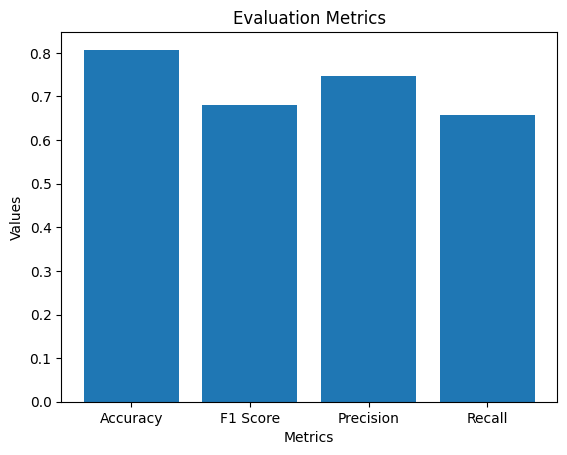

In [ ]:
# Các giá trị đánh giá
values = [accuracy_svm, f1_svm, precision_svm, recall_svm]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()


Dựa vào các kết quả đánh giá hiệu suất của mô hình SVM trên dữ liệu, ta có:

- Độ chính xác (Accuracy): Kết quả đạt được là  0.80713, tức là mô hình phân loại đúng khoảng 80.713% mẫu trong tập kiểm tra.
- F1 Score: Kết quả đạt được là 0.6802, cho thấy mô hình có khả năng cân bằng giữa độ chính xác và khả năng phát hiện trong việc phân loại.
- Độ chính xác của dự đoán tích cực (Precision): Kết quả đạt được là 0.74580, tức là mô hình phân loại chính xác khoảng 74.581% mẫu được dự đoán là tích cực (có thu nhập vượt qua ngưỡng) trong tổng số các mẫu tích cực được dự đoán.
- Tỷ lệ phát hiện tích cực (Recall): Kết quả đạt được là 0.65787, cho thấy mô hình có khả năng phát hiện khoảng 65.787% mẫu tích cực trong tổng số mẫu tích cực thực tế.

Các giá trị này cho thấy mô hình SVM sử dụng kernel= linear có hiệu suất tương đối tốt trong việc phân loại, với độ chính xác và khả năng phát hiện tích cực đạt mức cao. Tuy nhiên, vẫn có một khoảng cách nhất định giữa độ chính xác của dự đoán tích cực và tỷ lệ phát hiện tích cực, chỉ ra rằng mô hình có thể có một số sai sót trong việc phân loại các mẫu tích cực.

### SVM **rbf**

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_svm_rbf = clf.predict(X_test)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average="macro")
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average="macro")
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average="macro")

# In kết quả
print("Accuracy:", accuracy_svm_rbf)
print("F1 Score:", f1_svm_rbf)
print("Precision:", precision_svm_rbf)
print("Recall:", recall_svm_rbf)

Accuracy: 0.7637737239727289
F1 Score: 0.4330338487254492
Precision: 0.38188686198636446
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


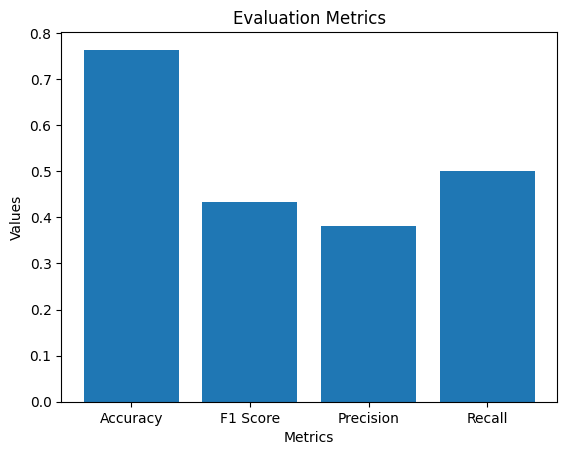

In [ ]:
# Các giá trị đánh giá
values = [accuracy_svm_rbf, f1_svm_rbf, precision_svm_rbf, recall_svm_rbf]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Dựa vào các kết quả đánh giá hiệu suất của mô hình SVM trên dữ liệu, ta có:
- Độ chính xác (Accuracy): Kết quả đạt được là 0.76377, tức là mô hình phân loại đúng khoảng 76.38% mẫu trong tập kiểm tra.
- Điểm F1 (F1 Score): Kết quả đạt được là 0.43303, cho thấy mô hình có khả năng cân bằng giữa độ chính xác và khả năng phát hiện khoảng 43.3% trong việc phân loại.
- Độ chính xác dự báo tích cực (Precision): Kết quả đạt được là 0.38188, tức là mô hình phân loại chính xác khoảng 38.19% mẫu được dự đoán là tích cực.
- Tỉ lệ phát hiện tích cực (Recall): Kết quả đạt được là 0.5, cho thấy mô hình có khả năng phát hiện khoảng 50% mẫu tích cực trong tổng số mẫu tích cực thực tế.

Các giá trị này cho thấy mô hình SVM sử dụng kernel = rbf không đạt được độ chính xác cao và khả năng phân loại chưa tốt. 

### SVM **poly**

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred_svm_poly = clf.predict(X_test)
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
precision_svm_poly = precision_score(y_test, y_pred_svm_poly, average="macro")
recall_svm_poly = recall_score(y_test, y_pred_svm_poly, average="macro")
f1_svm_poly = f1_score(y_test, y_pred_svm_poly, average="macro")

# In kết quả
print("Accuracy:", accuracy_svm_poly)
print("F1 Score:", f1_svm_poly)
print("Precision:", precision_svm_poly)
print("Recall:", recall_svm_poly)

Accuracy: 0.7637737239727289
F1 Score: 0.4330338487254492
Precision: 0.38188686198636446
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


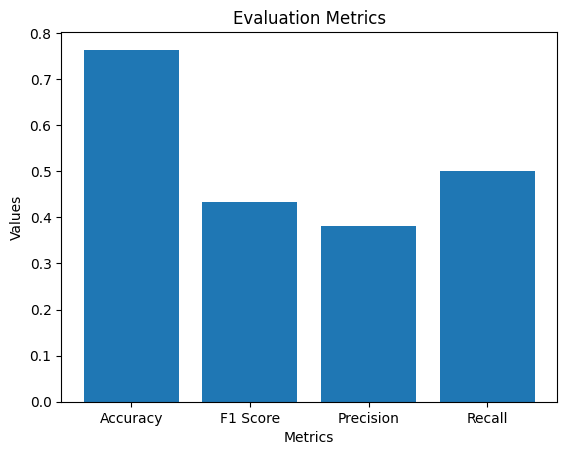

In [ ]:
# Các giá trị đánh giá
values = [accuracy_svm_poly, f1_svm_poly, precision_svm_poly, recall_svm_poly]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Dựa vào các kết quả đánh giá hiệu suất của mô hình SVM trên dữ liệu, ta có:

- Độ chính xác (Accuracy): Kết quả đạt được là 0.76377, tức là mô hình phân loại đúng khoảng 76.38% mẫu trong tập kiểm tra.
- Điểm F1 (F1 Score): Kết quả đạt được là 0.43303, cho thấy mô hình có khả năng cân bằng giữa độ chính xác và khả năng phát hiện khoảng 43.3% trong việc phân loại.
- Độ chính xác dự báo tích cực (Precision): Kết quả đạt được là 0.38188, tức là mô hình phân loại chính xác khoảng 38.19% mẫu được dự đoán là tích cực.
- Tỉ lệ phát hiện tích cực (Recall): Kết quả đạt được là 0.5, cho thấy mô hình có khả năng phát hiện khoảng 50% mẫu tích cực trong tổng số mẫu tích cực thực tế.

Các giá trị này cho thấy mô hình SVM sử dụng kernel = rbf không đạt được độ chính xác cao và khả năng phân loại chưa tốt.

### So sánh 3 kernels

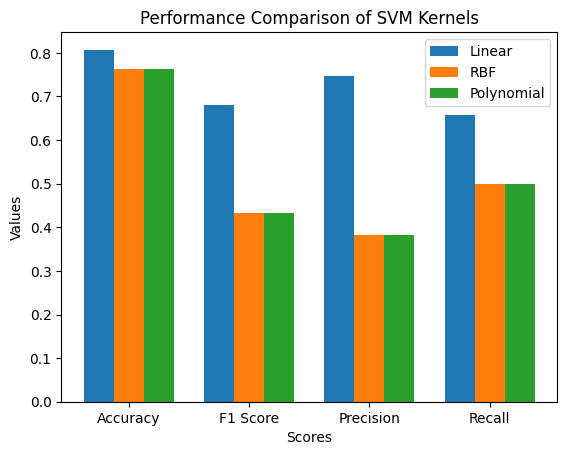

In [ ]:
# Dữ liệu
kernels = ['Linear', 'RBF', 'Polynomial']
scores = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Giá trị của kernel theo từng score
linear_scores = [accuracy_svm, f1_svm, precision_svm, recall_svm]
rbf_scores = [accuracy_svm_rbf, f1_svm_rbf, precision_svm_rbf, recall_svm_rbf]
poly_scores = [accuracy_svm_poly, f1_svm_poly, precision_svm_poly, recall_svm_poly]

# Xác định vị trí và chiều rộng của các cột
bar_width = 0.25
index = np.arange(len(scores))

# Vẽ biểu đồ cột
plt.bar(index, linear_scores, bar_width, label='Linear')
plt.bar(index + bar_width, rbf_scores, bar_width, label='RBF')
plt.bar(index + 2 * bar_width, poly_scores, bar_width, label='Polynomial')

# Đặt các chỉ mục và nhãn trục x
plt.xticks(index + bar_width, scores)
plt.xlabel('Scores')
plt.ylabel('Values')

# Đặt tiêu đề và hiển thị chú thích
plt.title('Performance Comparison of SVM Kernels')
plt.legend()

# Hiển thị biểu đồ cột
plt.show()


***Dựa trên các giá trị này, kernel linear có kết quả tốt hơn so với kernel rbf và kernel poly. Kernel linear đạt giá trị Accuracy cao hơn và có các giá trị F1 Score, Precision và Recall tương đối tốt.***

### **kNN**

In [ ]:
k_values = [3, 5, 7, 9, 11]  # Các giá trị k cần kiểm tra
best_accuracy = 0
best_k = 0

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # Áp dụng 5-fold cross-validation
    accuracy = scores.mean()  # Đánh giá bằng độ chính xác trung bình
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k:", best_k)
knn_model = KNeighborsClassifier(n_neighbors=best_k)
# Huấn luyện mô hình
knn_model.fit(X_train, y_train) 
# Dự đoán nhãn cho tập kiểm tra
y_pred_knn = knn_model.predict(X_test) 

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average="macro")
recall_knn = recall_score(y_test, y_pred_knn, average="macro")
f1_knn = f1_score(y_test, y_pred_knn, average="macro")

#In kết quả
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)


Best k: 11
Accuracy: 0.8250107487255083
F1 Score: 0.7442240824971766
Precision: 0.7602780834566589
Recall: 0.7323419378270909


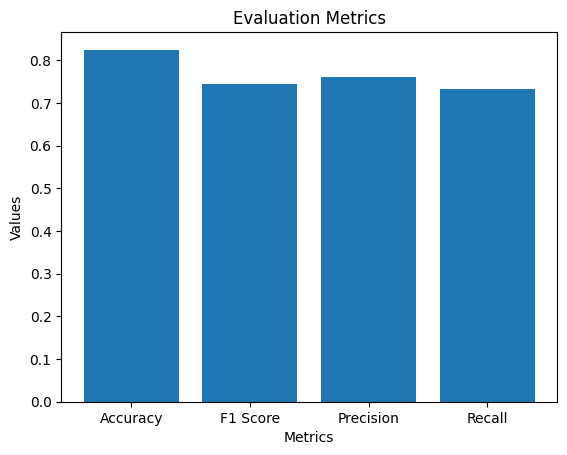

In [ ]:
# Các giá trị đánh giá
values = [accuracy_knn, f1_knn, precision_knn, recall_knn]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Các kết quả đánh giá hiệu suất của mô hình KNN trên tập dữ liệu là:

- Accuracy (Độ chính xác): Kết quả đạt được là 0.82502, tức là mô hình phân loại đúng khoảng 82.502% mẫu trong tập dữ liệu.

- F1 Score: Kết quả đạt được là 0.74422, cho thấy mô hình có khả năng cân bằng giữa precision và recall trong việc phân loại.

- Precision (Độ chính xác của positive): Kết quả đạt được là 0.76027, tức là mô hình phân loại chính xác khoảng 76.31% mẫu positive.

- Recall (Tỷ lệ phát hiện positive): Kết quả đạt được là 0.73234, cho thấy mô hình có khả năng phát hiện khoảng 73.234% mẫu positive trong tổng số mẫu positive thực tế.

Các giá trị này cho thấy mô hình KNN có hiệu suất tương đối tốt trong việc phân loại, với độ chính xác và khả năng phát hiện positive đạt mức khá cao. Độ chính xác và F1 Score tốt cho thấy mô hình có khả năng cân bằng giữa việc phân loại chính xác và việc phát hiện các mẫu positive.

### **Naïve Bayes**

In [ ]:
# Khởi tạo mô hình Naive Bayes
nb_model = GaussianNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_nb = nb_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average="macro")
recall_nb = recall_score(y_test, y_pred_nb, average="macro")
f1_nb = f1_score(y_test, y_pred_nb, average="macro")

# In kết quả
print("Accuracy:", accuracy_nb)
print("F1 Score:", f1_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)


Accuracy: 0.7895706651925557
F1 Score: 0.7328298328152276
Precision: 0.7197431459603181
Recall: 0.7571822149122394


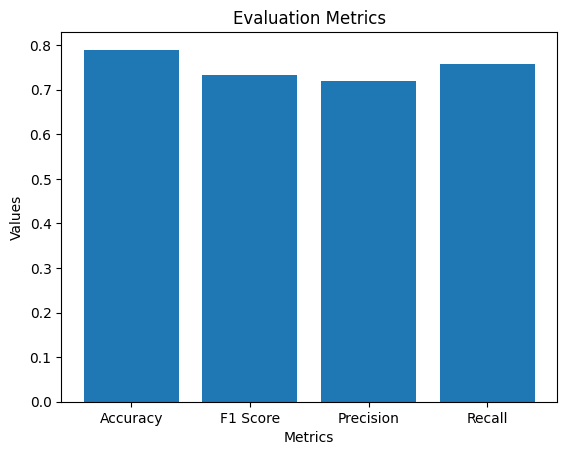

In [ ]:
# Các giá trị đánh giá
values = [accuracy_nb, f1_nb, precision_nb, recall_nb]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Đánh giá hiệu suất của mô hình Naïve Bayes trên tập kiểm tra cho kết quả như sau:

- Accuracy (Độ chính xác): Kết quả đạt được là 0.78957, tức là mô hình phân loại đúng khoảng 78.957 mẫu trong tập dữ liệu kiểm tra.
- F1 Score: Kết quả đạt được là 0.73282, cho thấy mô hình có khả năng cân bằng giữa precision và recall trong việc phân loại.
- Precision (Độ chính xác): Kết quả đạt được là 0.71974, tức là mô hình phân loại chính xác khoảng 71.947% mẫu positive (hay mẫu thuộc lớp dương).
- Recall (Tỷ lệ phát hiện): Kết quả đạt được là 0.75718, cho thấy mô hình có khả năng phát hiện khoảng 75.718% mẫu positive trong tổng số mẫu positive thực tế.

Các giá trị này cho thấy mô hình Naïve Bayes có hiệu suất tương đối tốt trong việc phân loại, với độ chính xác và khả năng phát hiện positive đạt mức khá cao. Tuy nhiên, vẫn có một khoảng cách nhất định giữa precision và recall, chỉ ra rằng mô hình có thể có một số sai sót trong việc phân loại các mẫu positive.

### **Random Forests**

In [ ]:
# Khởi tạo mô hình Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# In kết quả
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Accuracy: 0.819851360481543
Precision: 0.7527543570547988
Recall: 0.7223194621391611
F1 Score: 0.734965120915759


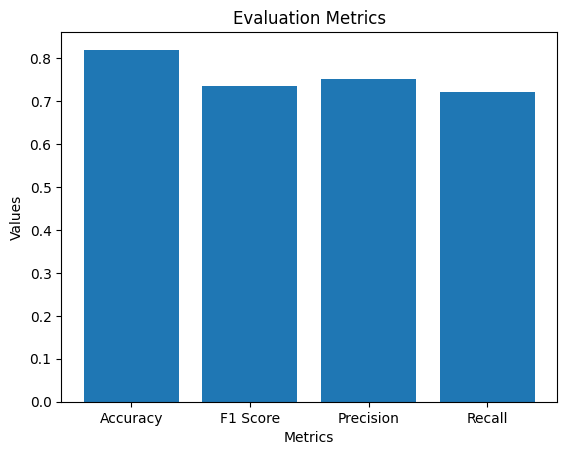

In [ ]:
# Các giá trị đánh giá
values = [accuracy_rf, f1_rf, precision_rf, recall_rf]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Đánh giá hiệu suất của mô hình Random Forest trên tập kiểm tra cho kết quả như sau:

- Accuracy (Độ chính xác): Kết quả đạt được là 0.81985, tức là mô hình phân loại đúng khoảng 81.985% mẫu trong tập dữ liệu kiểm tra.
- Precision (Độ chính xác): Kết quả đạt được là 0.75275, tức là mô hình phân loại chính xác khoảng 75.275% mẫu positive (hay mẫu thuộc lớp dương).
- Recall (Tỷ lệ phát hiện): Kết quả đạt được là 0.72231, cho thấy mô hình có khả năng phát hiện khoảng 72.231% mẫu positive trong tổng số mẫu positive thực tế.
- F1 Score: Kết quả đạt được là 0.73496, cho thấy mô hình có khả năng cân bằng giữa precision và recall trong việc phân loại.

Các giá trị này cho thấy mô hình Random Forest có hiệu suất tương đối tốt trong việc phân loại, với độ chính xác và khả năng phát hiện positive đạt mức khá cao. Tuy nhiên, vẫn có một khoảng cách nhất định giữa precision và recall, chỉ ra rằng mô hình có thể có một số sai sót trong việc phân loại các mẫu positive.

### **Decision Tree**

In [ ]:
# Khởi tạo mô hình Decision Tree
clf = DecisionTreeClassifier()

# Huấn luyện mô hình trên bộ dữ liệu huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn của các mẫu trong tập kiểm tra
y_pred_dt = clf.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# In kết quả
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Accuracy: 0.7791904674160064
Precision: 0.6930863444636413
Recall: 0.6896847068092615
F1 Score: 0.6913361054630295


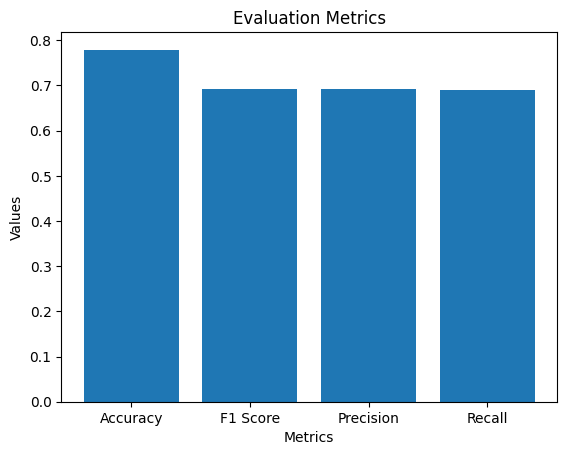

In [ ]:
# Các giá trị đánh giá
values = [accuracy_dt, f1_dt, precision_dt, recall_dt]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

Đánh giá hiệu suất của mô hình Decision Tree trên tập kiểm tra cho kết quả như sau:

- Accuracy (Độ chính xác): Kết quả đạt được là 0.77919, tức là mô hình phân loại đúng khoảng 77.919% mẫu trong tập dữ liệu kiểm tra.
- Precision (Độ chính xác): Kết quả đạt được là 0.69308, tức là mô hình phân loại chính xác khoảng 69.308% mẫu positive (hay mẫu thuộc lớp dương).
- Recall (Tỷ lệ phát hiện): Kết quả đạt được là 0.68968, cho thấy mô hình có khả năng phát hiện khoảng 68.968% mẫu positive trong tổng số mẫu positive thực tế.
- F1 Score: Kết quả đạt được là 0.69133, cho thấy mô hình có khả năng cân bằng giữa precision và recall trong việc phân loại.

Các giá trị này cho thấy mô hình Decision Tree có hiệu suất tương đối tốt trong việc phân loại, với độ chính xác và khả năng phát hiện positive đạt mức khá cao. Tuy nhiên, vẫn có một khoảng cách nhất định giữa precision và recall, chỉ ra rằng mô hình có thể có một số sai sót trong việc phân loại các mẫu positive.

### **So sánh và đánh giá thuật toán**

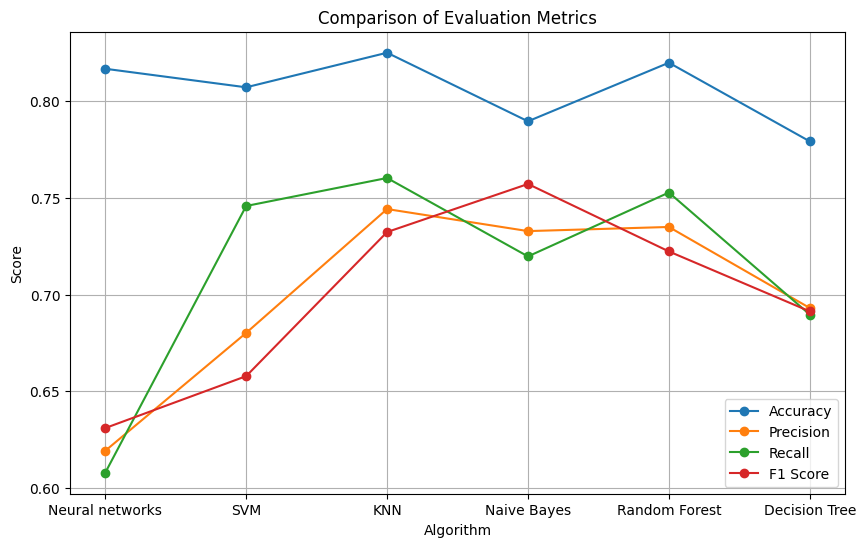

In [ ]:
# Các giá trị đánh giá
accuracy_values = [accuracy_neural, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_rf, accuracy_dt]
precision_values = [f1_neural, f1_svm, f1_knn, f1_nb, f1_rf, precision_dt]
recall_values = [precision_neural, precision_svm, precision_knn, precision_nb, precision_rf, recall_dt]
f1_values = [recall_neural, recall_svm, recall_knn, recall_nb, recall_rf, f1_dt]

# Tên các thuật toán
algorithms = ['Neural networks', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy_values, marker='o', label='Accuracy')
plt.plot(algorithms, precision_values, marker='o', label='Precision')
plt.plot(algorithms, recall_values, marker='o', label='Recall')
plt.plot(algorithms, f1_values, marker='o', label='F1 Score')

# Đặt tên cho trục x và trục y
plt.xlabel('Algorithm')
plt.ylabel('Score')

# Đặt tiêu đề cho biểu đồ
plt.title('Comparison of Evaluation Metrics')

# Thêm các đường kẻ
plt.grid(True)

# Đặt chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()



***Dựa trên các giá trị này, thuật toán KNN có kết quả tốt nhất với giá trị Accuracy cao nhất và các giá trị F1 Score, Precision, Recall khá ổn định. Thuật toán Neural Network cũng cho kết quả tương đối tốt với giá trị Accuracy và F1 Score khá cao, tuy nhiên, Precision và Recall của nó không cao bằng thuật toán KNN nhưng khá cân bằng.***

## Kết luận

Dựa trên kết quả đánh giá của các thuật toán trong bài toán phân tích dataset adult, ta có thể kết luận như sau:

1. Các thuật toán như KNN và Neural Network cho kết quả tốt với độ chính xác (Accuracy) cao và giá trị F1 Score đáng tin cậy. Đây là những thuật toán có khả năng phân loại tốt các mẫu trong dataset adult.

2. Thuật toán KNN có tính đơn giản và thời gian huấn luyện nhanh, có thể phù hợp cho các ứng dụng cần tốc độ phân tích nhanh và không yêu cầu quá nhiều tính toán.

3. Neural Network cho kết quả tốt với độ chính xác và F1 Score cao, đặc biệt trong việc xử lý các bài toán phức tạp hơn và có tính linh hoạt cao trong việc học từ dữ liệu.

Ứng dụng của việc phân tích dataset adult có thể bao gồm:

Phân loại thu nhập: Dựa trên các thuộc tính của dataset, ta có thể xây dựng mô hình để phân loại thu nhập của các cá nhân (thấp hoặc cao) và áp dụng trong các bài toán liên quan đến tài chính, kế hoạch ngân sách, định hướng chiến lược về tài sản, và quản lý tài chính cá nhân.